In [1]:
# Libraries

import pandas as pd
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# this is what we will study
# Path to your .sav file
file_path = 'data/Uber climate surve file with school level data 10 09 2024.sav'

# Read the .sav file into a pandas DataFrame
main, meta = pyreadstat.read_sav(file_path)

# Display the first few rows of the DataFrame
print(main.head())



    U031ID  U031ScID  uberdata                    U031SrNm  U031GrNm  \
0  18118.0       1.0       1.0  MDS3 Climate Survey Year 4  Students   
1  18119.0       1.0       1.0  MDS3 Climate Survey Year 4  Students   
2  18120.0       1.0       1.0  MDS3 Climate Survey Year 4  Students   
3  18122.0       1.0       1.0  MDS3 Climate Survey Year 4  Students   
4  18123.0       1.0       1.0  MDS3 Climate Survey Year 4  Students   

   U031GrID  U031DsID      U031DsNm               U031PwSN  U031CLRM  ...  \
0       1.0       1.0  Anne Arundel  Annapolis High School       4.0  ...   
1       1.0       1.0  Anne Arundel  Annapolis High School       4.0  ...   
2       1.0       1.0  Anne Arundel  Annapolis High School       4.0  ...   
3       1.0       1.0  Anne Arundel  Annapolis High School       4.0  ...   
4       1.0       1.0  Anne Arundel  Annapolis High School       4.0  ...   

  U0CSEVPH_schl_level_mean U0CSEVSP_schl_level_mean U0CSEVDL_schl_level_mean  \
0                 2.0951

# Data Checks

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def display_mean_distribution(df, variable_names):
    """
    Display the distribution of variables containing mean values from the DataFrame.
    This includes a histogram and a boxplot to reflect the small variation in the means.

    Parameters:
    - df: Pandas DataFrame containing the data.
    - variable_names: List of variable names (columns) to analyze.
    """
    for var in variable_names:
        print(f"Distribution for: {var}")
        
        # Display basic statistics for the variable
        print(f"\nStatistics for {var}:")
        print(df[var].describe())
        
        # Plot the distribution with histogram and boxplot
        fig, ax = plt.subplots(1, 2, figsize=(14, 6))
        
        # Histogram plot
        sns.histplot(df[var], kde=True, bins=15, color='dodgerblue', ax=ax[0], edgecolor='black')
        ax[0].set_title(f"Histogram of {var}", fontsize=14, fontweight='bold')
        ax[0].set_xlabel(f"{var}", fontsize=12)
        ax[0].set_ylabel("Frequency", fontsize=12)
        ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Boxplot
        sns.boxplot(x=df[var], color='lightcoral', ax=ax[1])
        ax[1].set_title(f"Boxplot of {var}", fontsize=14, fontweight='bold')
        ax[1].set_xlabel(f"{var}", fontsize=12)
        ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)

        # Display plot
        plt.tight_layout()
        plt.show()
        print("\n" + "="*50 + "\n")

# Example usage (assuming df is your DataFrame and you provide a list of variables):
# variable_list = ['U0CSRTLT_schl_level_mean', 'U0CSNTRN_schl_level_mean'] 
# display_mean_distribution(df, variable_list)


In [4]:
school_climate_scores = [
    'U0CSRTLT_schl_level_mean',  # Climate survey Uber: Climate score: Retaliating: mean of EI1, EI2, EI3, and EI4
    'U0CSNTRN_schl_level_mean',  # Climate survey Uber: Climate score: Internalizing: mean of EI9, EI10, EI11, EI12, and EI13
    'U0CSSAPH_schl_level_mean',  # Climate survey Uber: Climate score: Safety: physical safety, mean of SV1R, SV5R, SR1R, and SV10
    'U0CSSABL_schl_level_mean',  # Climate survey Uber: Climate score: Safety: bullying, mean of SV9, SV12, BU5R, SV6R
    'U0CSSASB_schl_level_mean',  # Climate survey Uber: Climate score: Safety: general drug use, mean of SV14, SV15, SV16
    'U0CSENRL_schl_level_mean',  # Climate survey Uber: Climate score: Engagement: teacher connectedness, mean of CO6R, CO8R, CO13R, SE2R, CO5R, CO10R
    'U0CSENSC_schl_level_mean',  # Climate survey Uber: Climate score: Engagement: student connectedness, mean of CO1R, CO7R, CO12R, CO2R, CO9R
    'U0CSENAC_schl_level_mean',  # Climate survey Uber: Climate score: Engagement: achievement, mean of AE1R, AE2R, AE4R, AE5R
    'U0CSENWC_schl_level_mean',  # Climate survey Uber: Climate score: Engagement: whole-school connectedness, mean of CO20R, SE4R, SE7R, SE5R
    'U0CSENCL_schl_level_mean',  # Climate survey Uber: Climate score: Engagement: culture of equity, mean of FC1R, FC3R, FC4R, FC8R
    'U0CSENPR_schl_level_mean',  # Climate survey Uber: Climate score: Engagement: parent involvement, mean of FI4R, FI3R, FI5R, FI1R, FI2R
    'U0CSEVRC_schl_level_mean',  # Climate survey Uber: Climate score: Environment: rules & consequences, mean of OD3R, OD6R, OD7R, OD10R & OD11R
    'U0CSEVPH_schl_level_mean',  # Climate survey Uber: Climate score: Environment: physical comfort/cleanliness, mean of PD2R, PD3R, PD4R, PD6R
    'U0CSEVSP_schl_level_mean',  # Climate survey Uber: Climate score: Environment: support, mean of SR2R, SR4R, SR5R
    'U0CSEVDL_schl_level_mean',  # Climate survey Uber: Climate score: Environment: delinquency, mean of OR2, OD5, OD8, PD1, PD5
    'U0CSSAFT_schl_level_mean',  # Climate survey Uber: Climate score: Safety: mean of U0CSSAPH, U0CSSABL, U0CSSASB
    'U0CSENGM_schl_level_mean',  # Climate survey Uber: Climate score: Engagement: mean of U0CSENRL, U0CSENSC, U0CSENAC, U0CSENWC, U0CSENCL, U0CSENPR
    'U0CSENVR_schl_level_mean',  # Climate survey Uber: Climate score: Environment: mean of U0CSEVRC, U0CSEVPH, U0CSEVSP, U0CSEVDL
]

other_variables = [
    'U032SUS_P',   # Uber School Level Data: U032SUS_P: Percent of out-of-school suspension
    'Tenrol',         # Uber School Level Data: Total Enrollment: Enrolled Count
    'AmIndian',    # Uber School Level Data: American Indian/Alaska Native Students
    'Asian',       # Uber School Level Data: Asian or Asian/Pacific Islander Students
    'AA',          # Uber School Level Data: Black/African Amer.
    'Hispanic',    # Uber School Level Data: Hispanic Students
    'White',       # Uber School Level Data: White Students
    'HiPac',       # Uber School Level Data: Hawaiian Nat./Pacific Isl. Students
    'Towmore',     # Uber School Level Data: Two or More Races Students
    'male',        #	Uber School Level Data: male
    "female",      #	Uber School Level Data: female


]

school_labels = other_variables + school_climate_scores
school_labels

['U032SUS_P',
 'Tenrol',
 'AmIndian',
 'Asian',
 'AA',
 'Hispanic',
 'White',
 'HiPac',
 'Towmore',
 'male',
 'female',
 'U0CSRTLT_schl_level_mean',
 'U0CSNTRN_schl_level_mean',
 'U0CSSAPH_schl_level_mean',
 'U0CSSABL_schl_level_mean',
 'U0CSSASB_schl_level_mean',
 'U0CSENRL_schl_level_mean',
 'U0CSENSC_schl_level_mean',
 'U0CSENAC_schl_level_mean',
 'U0CSENWC_schl_level_mean',
 'U0CSENCL_schl_level_mean',
 'U0CSENPR_schl_level_mean',
 'U0CSEVRC_schl_level_mean',
 'U0CSEVPH_schl_level_mean',
 'U0CSEVSP_schl_level_mean',
 'U0CSEVDL_schl_level_mean',
 'U0CSSAFT_schl_level_mean',
 'U0CSENGM_schl_level_mean',
 'U0CSENVR_schl_level_mean']

Distribution for: U0CSRTLT_schl_level_mean

Statistics for U0CSRTLT_schl_level_mean:
count    68240.000000
mean         2.634850
std          0.227233
min          2.262821
25%          2.447770
50%          2.627129
75%          2.777027
max          3.206024
Name: U0CSRTLT_schl_level_mean, dtype: float64


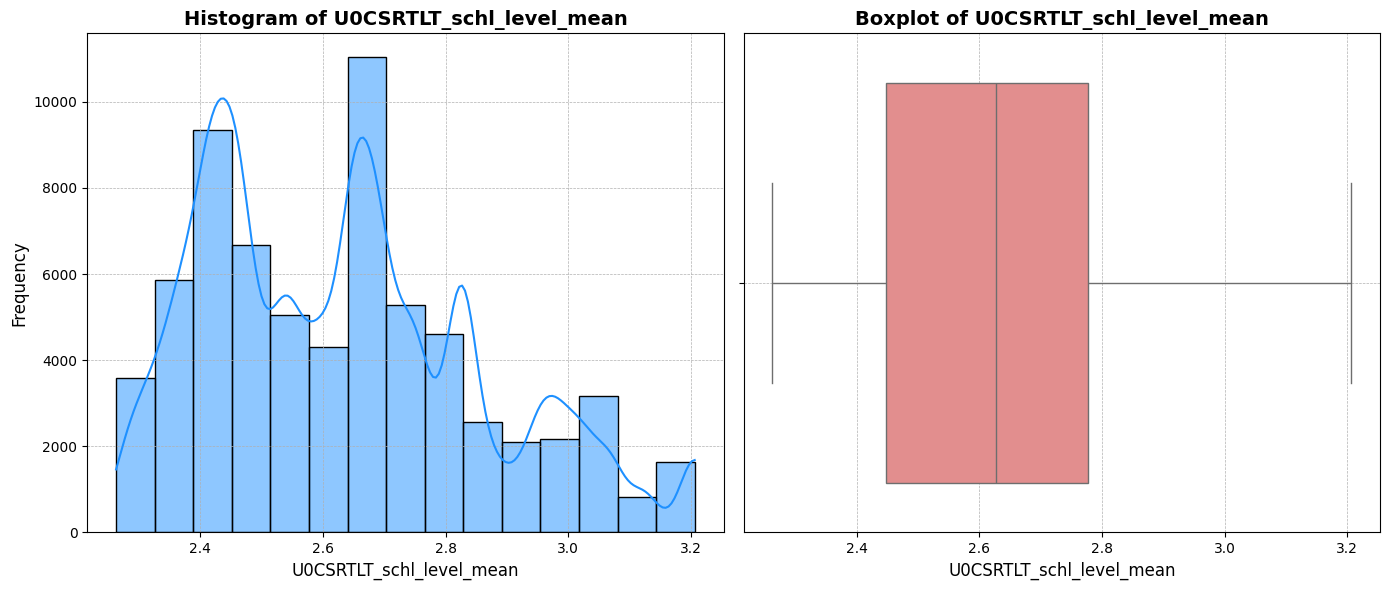



Distribution for: U0CSNTRN_schl_level_mean

Statistics for U0CSNTRN_schl_level_mean:
count    68240.000000
mean         3.109912
std          0.089730
min          2.926613
25%          3.034713
50%          3.116308
75%          3.175774
max          3.325092
Name: U0CSNTRN_schl_level_mean, dtype: float64


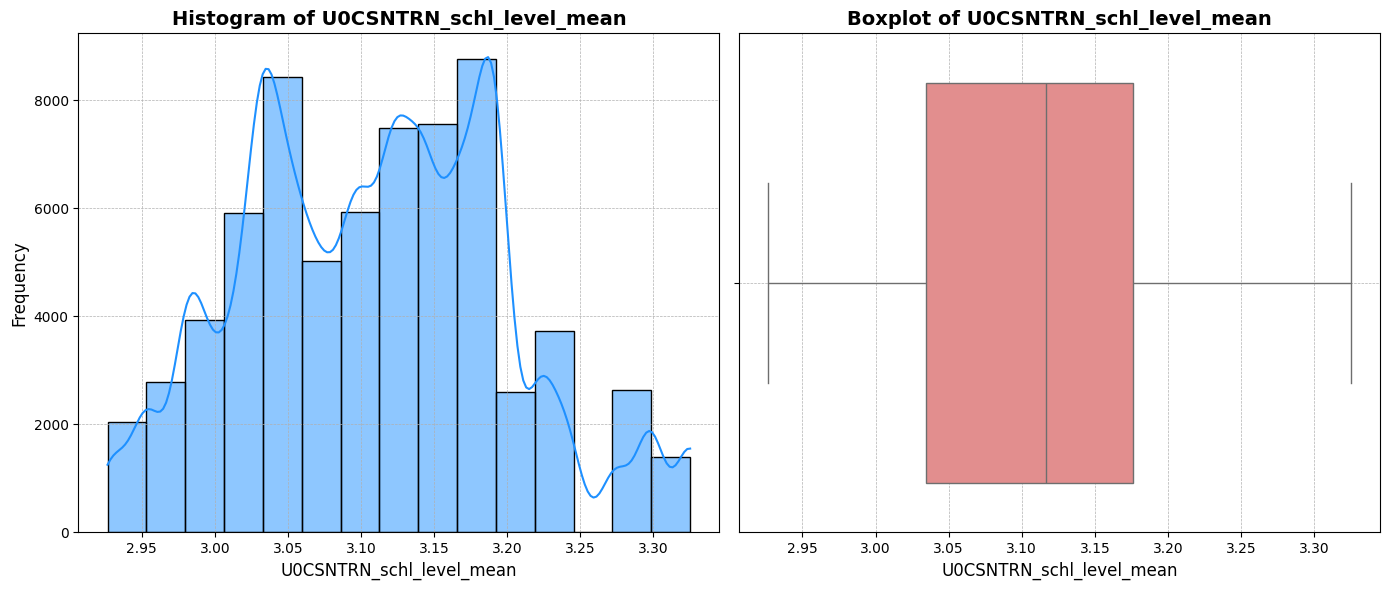



Distribution for: U0CSSAPH_schl_level_mean

Statistics for U0CSSAPH_schl_level_mean:
count    68240.000000
mean         3.105422
std          0.175774
min          2.709677
25%          2.970825
50%          3.112443
75%          3.217582
max          3.487103
Name: U0CSSAPH_schl_level_mean, dtype: float64


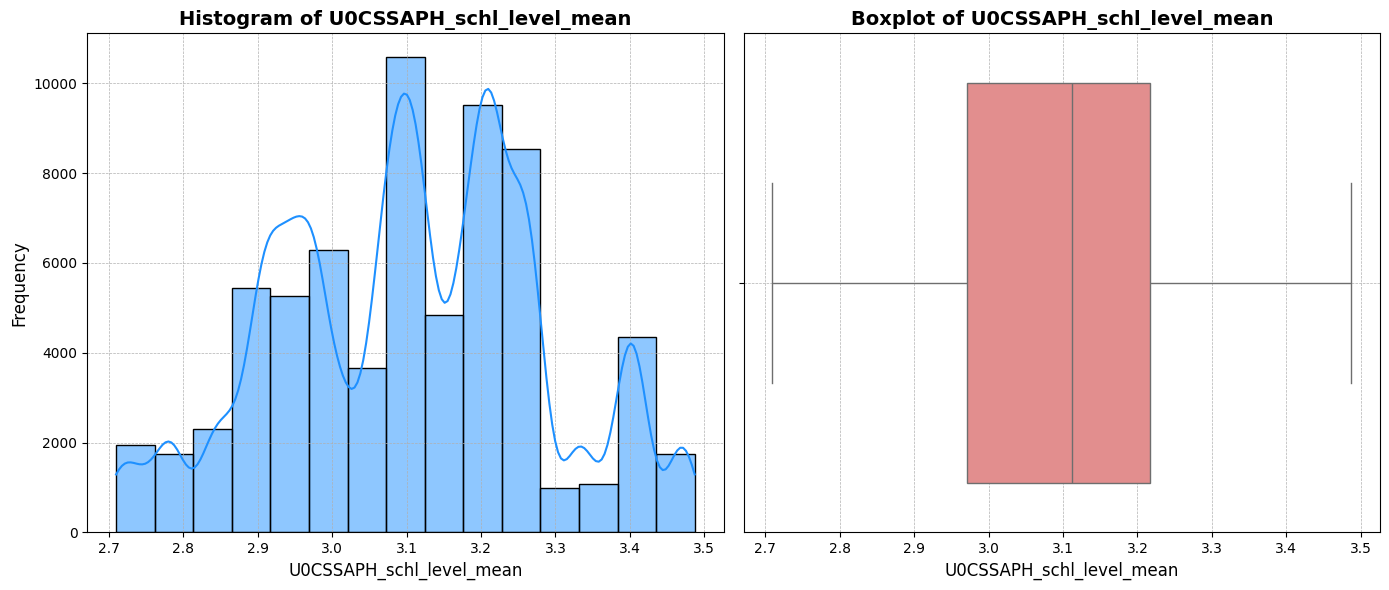



Distribution for: U0CSSABL_schl_level_mean

Statistics for U0CSSABL_schl_level_mean:
count    68240.000000
mean         2.471108
std          0.233747
min          2.020089
25%          2.306891
50%          2.449401
75%          2.619243
max          3.182744
Name: U0CSSABL_schl_level_mean, dtype: float64


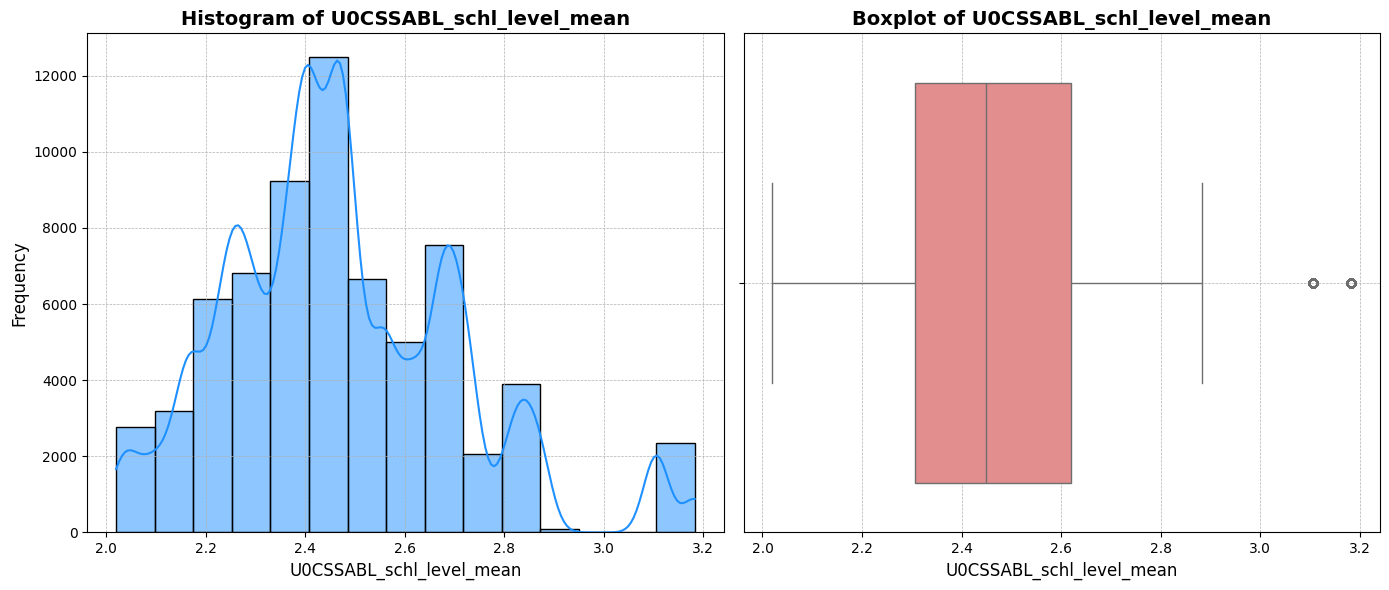



Distribution for: U0CSSASB_schl_level_mean

Statistics for U0CSSASB_schl_level_mean:
count    68240.000000
mean         2.861377
std          0.560649
min          1.853135
25%          2.334806
50%          2.821625
75%          3.410161
max          3.722924
Name: U0CSSASB_schl_level_mean, dtype: float64


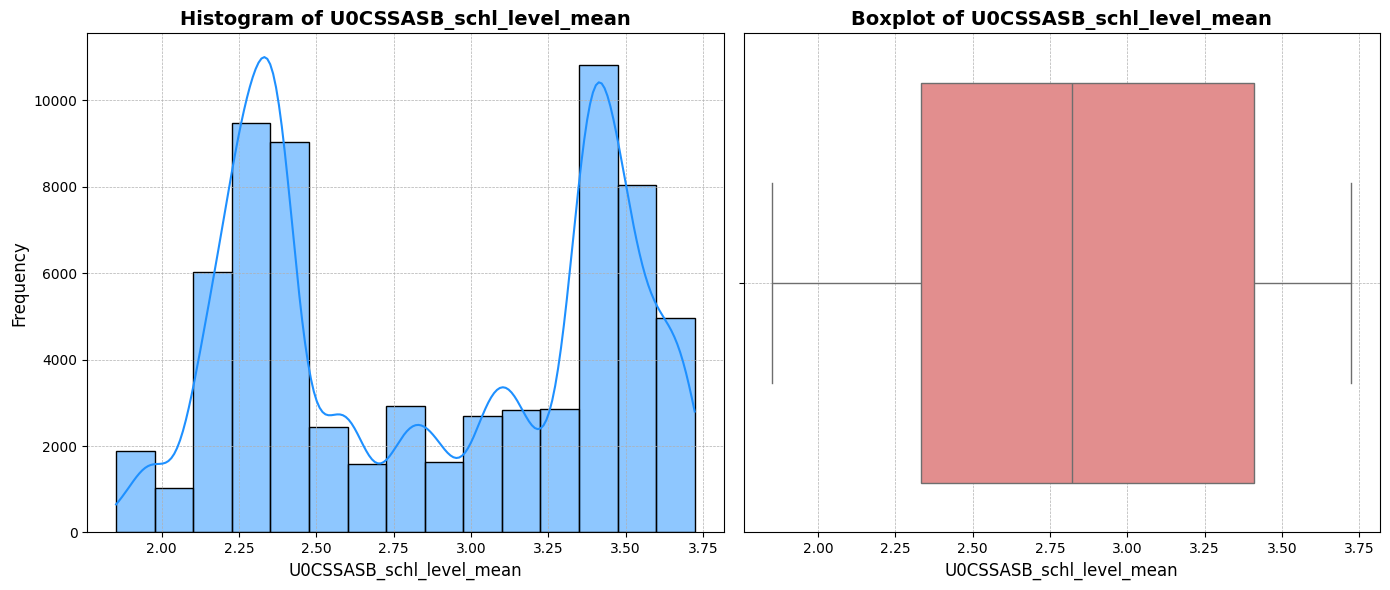



Distribution for: U0CSENRL_schl_level_mean

Statistics for U0CSENRL_schl_level_mean:
count    68240.000000
mean         2.880636
std          0.182297
min          2.462649
25%          2.756114
50%          2.868619
75%          3.022156
max          3.283333
Name: U0CSENRL_schl_level_mean, dtype: float64


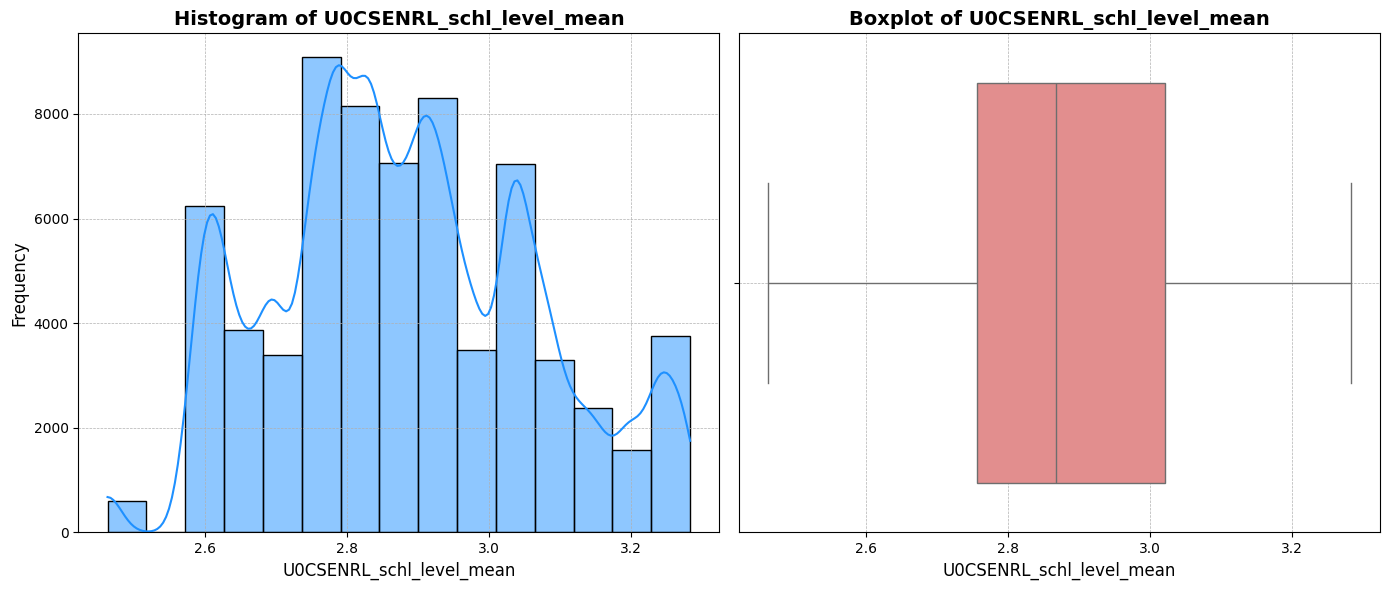



Distribution for: U0CSENSC_schl_level_mean

Statistics for U0CSENSC_schl_level_mean:
count    68240.000000
mean         2.660341
std          0.232121
min          2.177613
25%          2.504453
50%          2.684009
75%          2.810188
max          3.200000
Name: U0CSENSC_schl_level_mean, dtype: float64


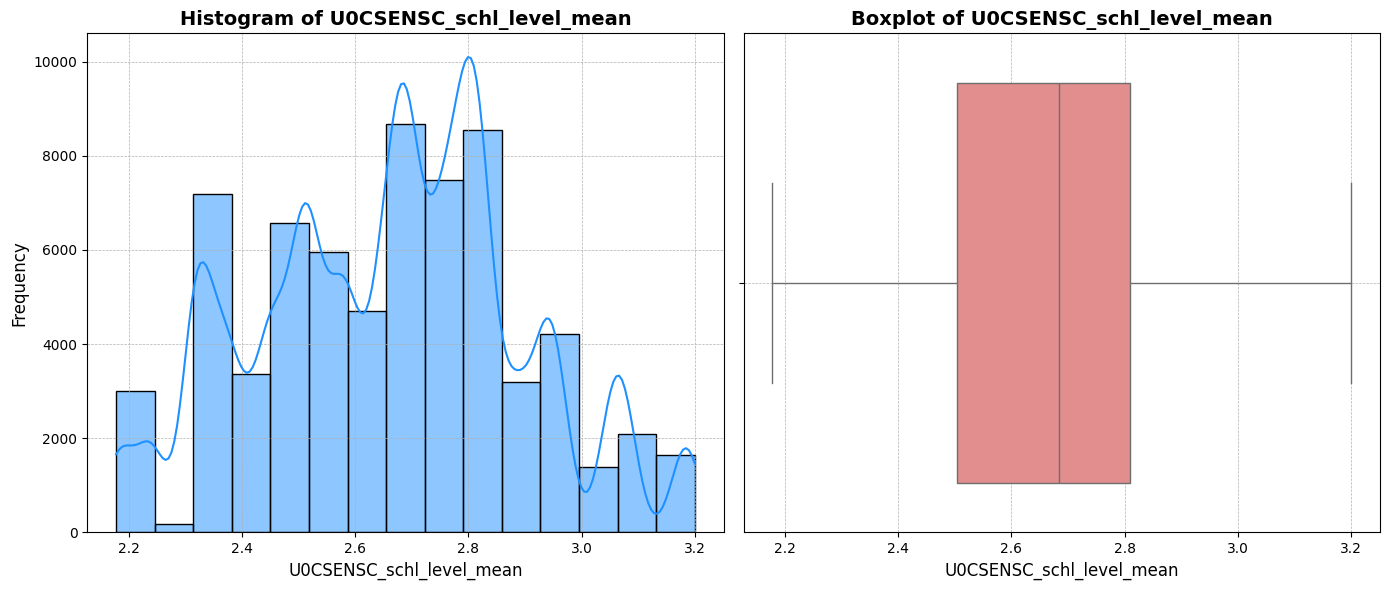



Distribution for: U0CSENAC_schl_level_mean

Statistics for U0CSENAC_schl_level_mean:
count    68240.000000
mean         3.403105
std          0.124270
min          3.047081
25%          3.323227
50%          3.391098
75%          3.500000
max          3.700000
Name: U0CSENAC_schl_level_mean, dtype: float64


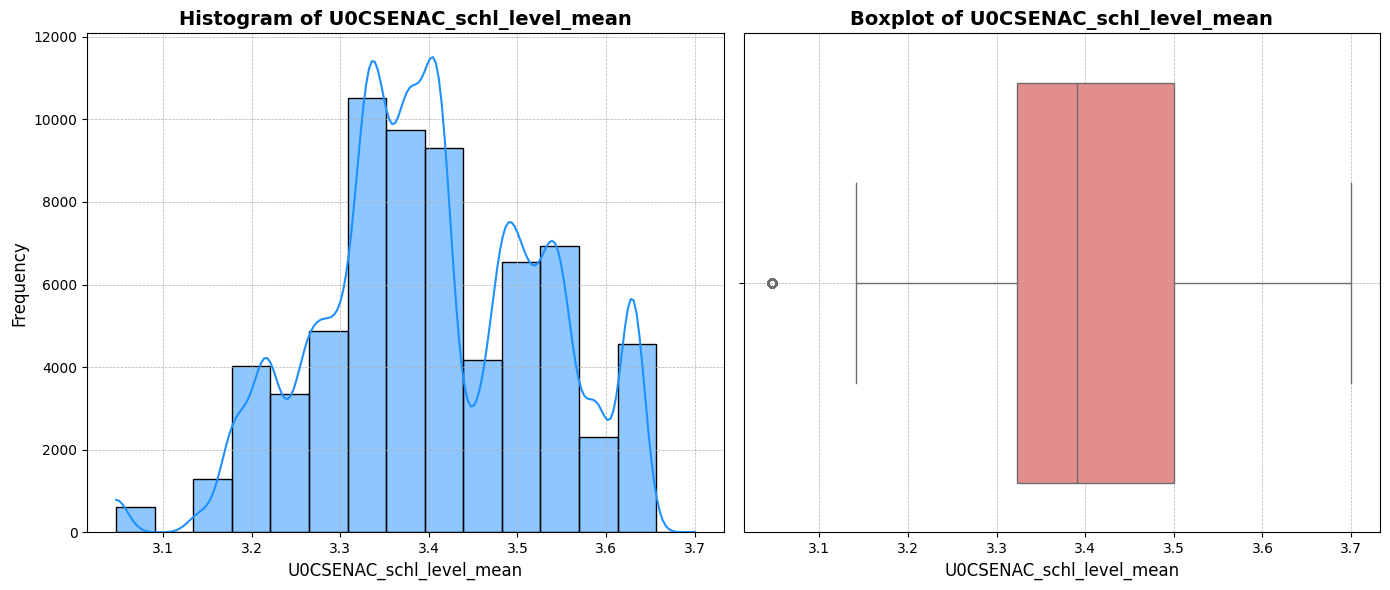



Distribution for: U0CSENWC_schl_level_mean

Statistics for U0CSENWC_schl_level_mean:
count    68240.000000
mean         2.719061
std          0.227386
min          2.151562
25%          2.524433
50%          2.740135
75%          2.871880
max          3.170370
Name: U0CSENWC_schl_level_mean, dtype: float64


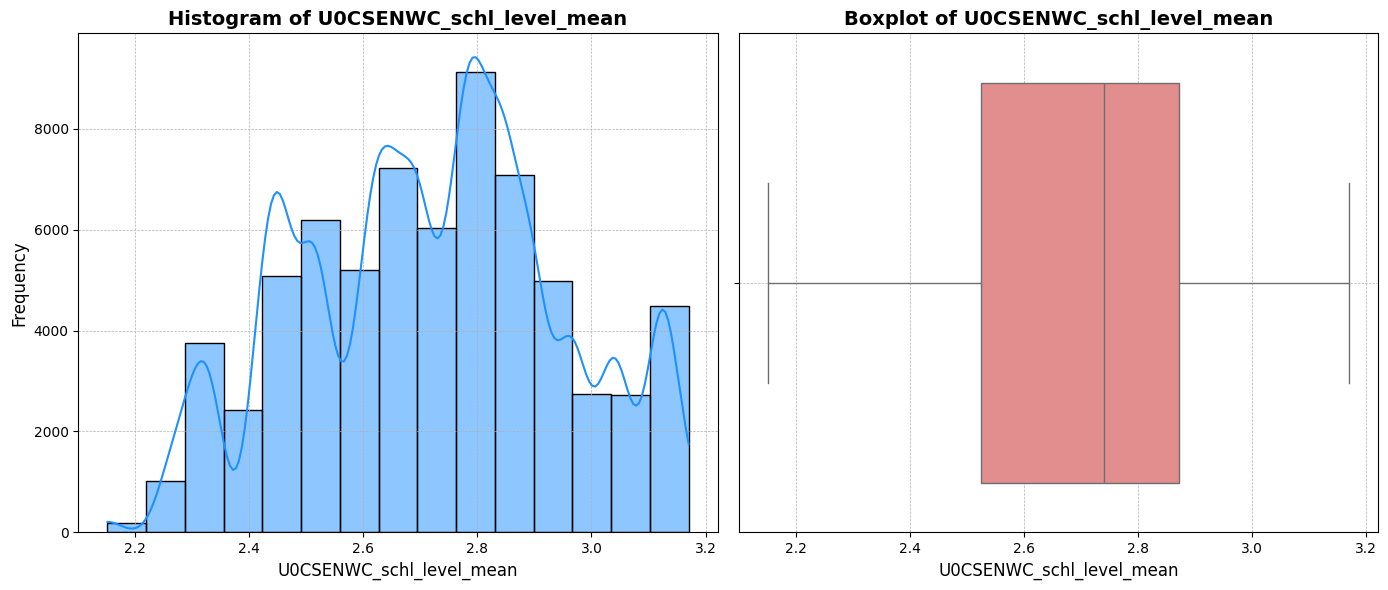



Distribution for: U0CSENCL_schl_level_mean

Statistics for U0CSENCL_schl_level_mean:
count    68240.000000
mean         2.782689
std          0.190429
min          2.374516
25%          2.649106
50%          2.791804
75%          2.894134
max          3.223525
Name: U0CSENCL_schl_level_mean, dtype: float64


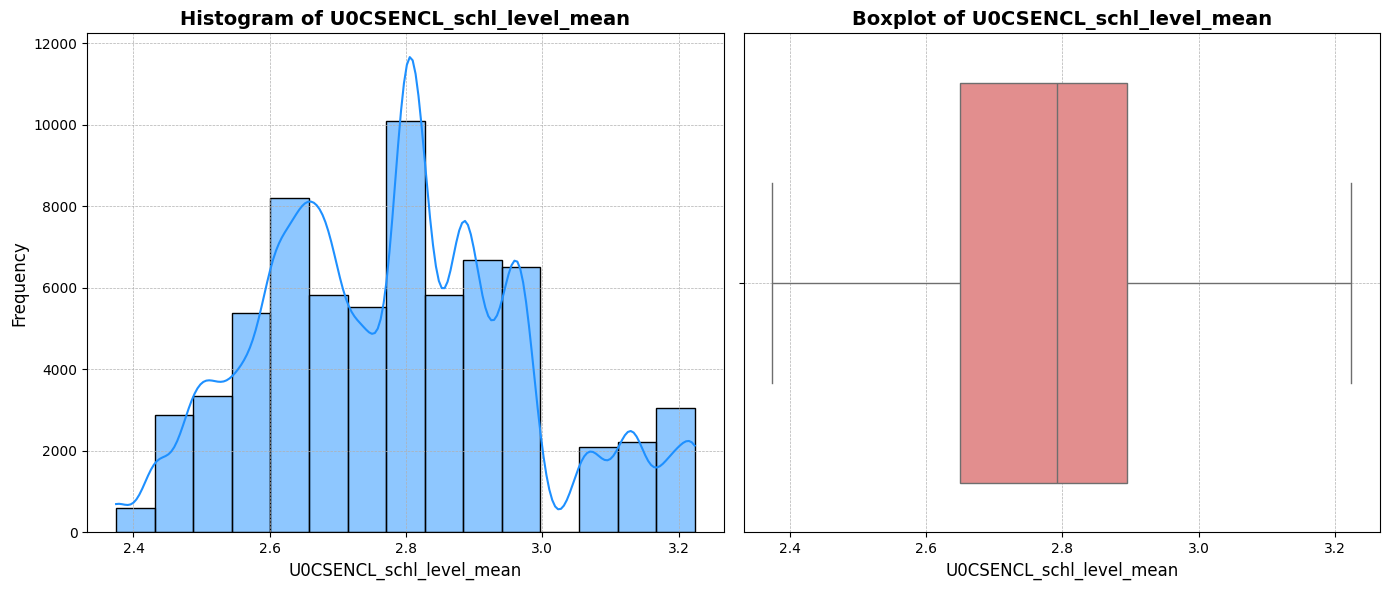



Distribution for: U0CSENPR_schl_level_mean

Statistics for U0CSENPR_schl_level_mean:
count    68240.000000
mean         2.756154
std          0.181374
min          2.379972
25%          2.629809
50%          2.740997
75%          2.890219
max          3.260000
Name: U0CSENPR_schl_level_mean, dtype: float64


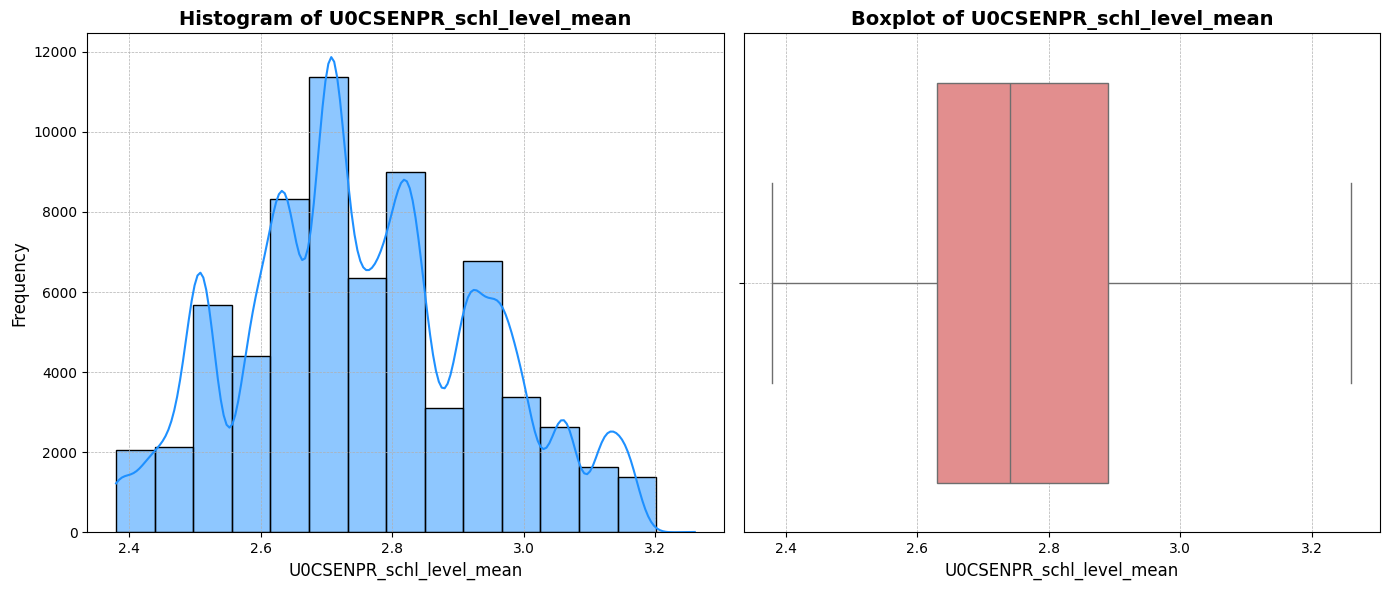



Distribution for: U0CSEVRC_schl_level_mean

Statistics for U0CSEVRC_schl_level_mean:
count    68240.000000
mean         2.658358
std          0.166818
min          2.291446
25%          2.549183
50%          2.650849
75%          2.780513
max          3.013555
Name: U0CSEVRC_schl_level_mean, dtype: float64


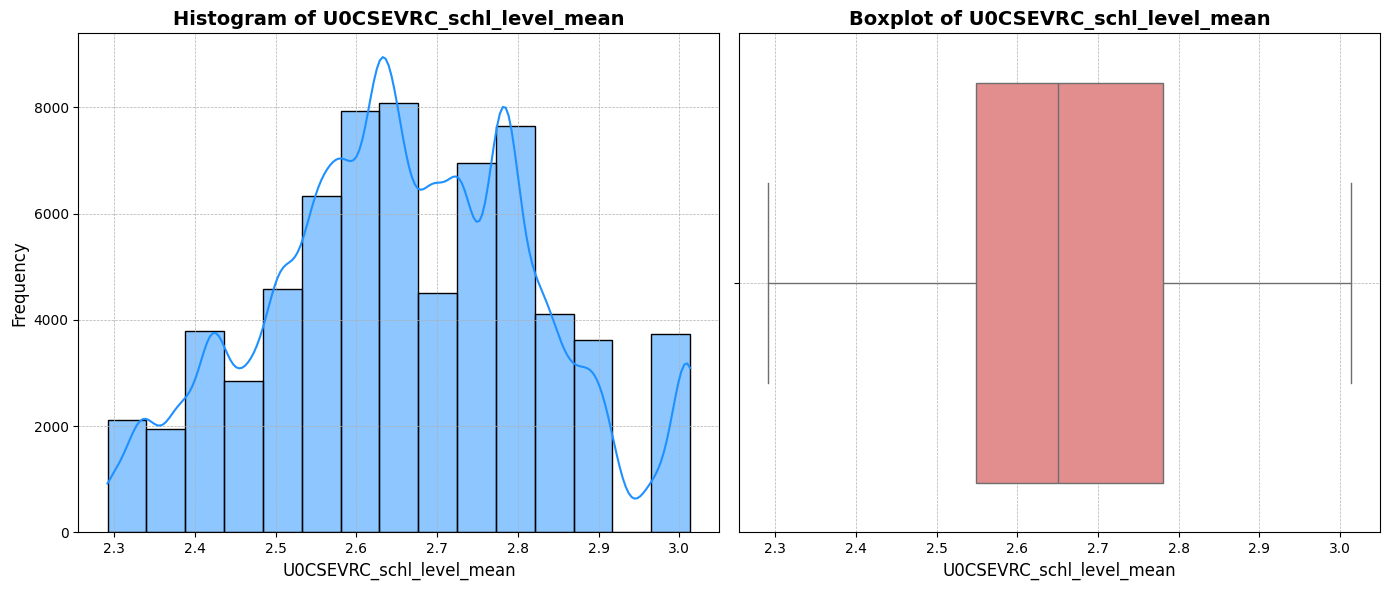



Distribution for: U0CSEVPH_schl_level_mean

Statistics for U0CSEVPH_schl_level_mean:
count    68240.000000
mean         2.321629
std          0.294704
min          1.658940
25%          2.114871
50%          2.299526
75%          2.530639
max          3.008065
Name: U0CSEVPH_schl_level_mean, dtype: float64


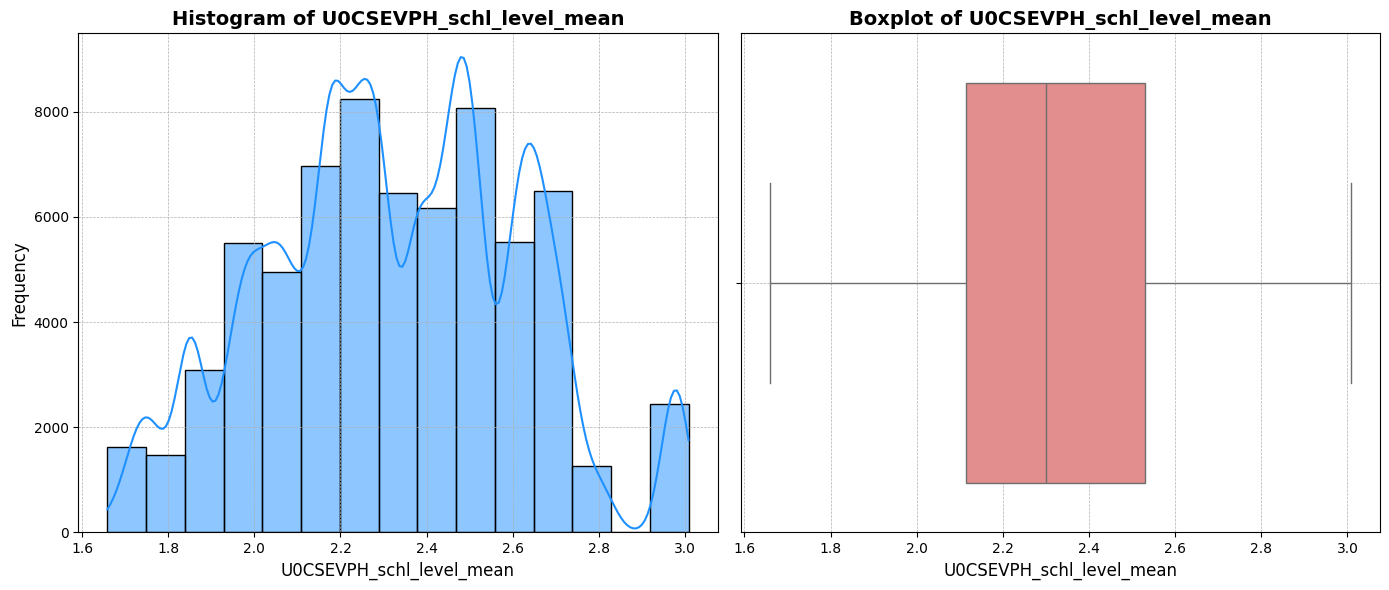



Distribution for: U0CSEVSP_schl_level_mean

Statistics for U0CSEVSP_schl_level_mean:
count    68240.000000
mean         2.846538
std          0.163213
min          2.462532
25%          2.723929
50%          2.843874
75%          2.959902
max          3.407407
Name: U0CSEVSP_schl_level_mean, dtype: float64


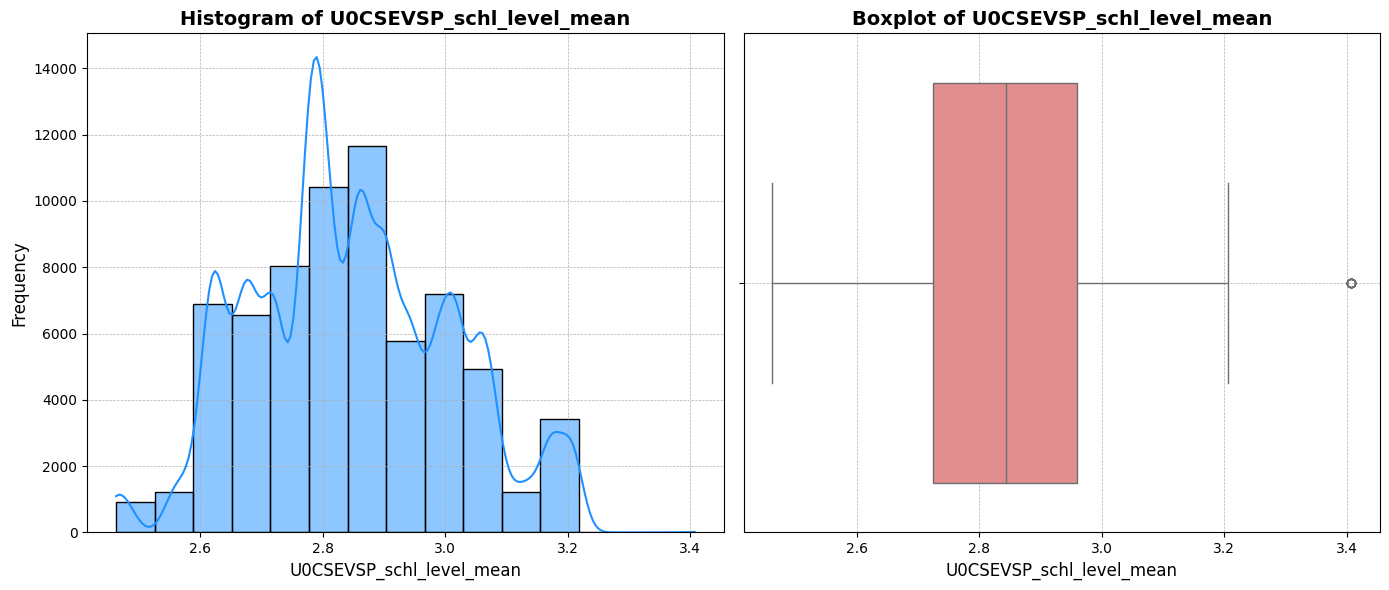



Distribution for: U0CSEVDL_schl_level_mean

Statistics for U0CSEVDL_schl_level_mean:
count    68240.000000
mean         2.453284
std          0.132289
min          2.034199
25%          2.362586
50%          2.467637
75%          2.509517
max          2.822488
Name: U0CSEVDL_schl_level_mean, dtype: float64


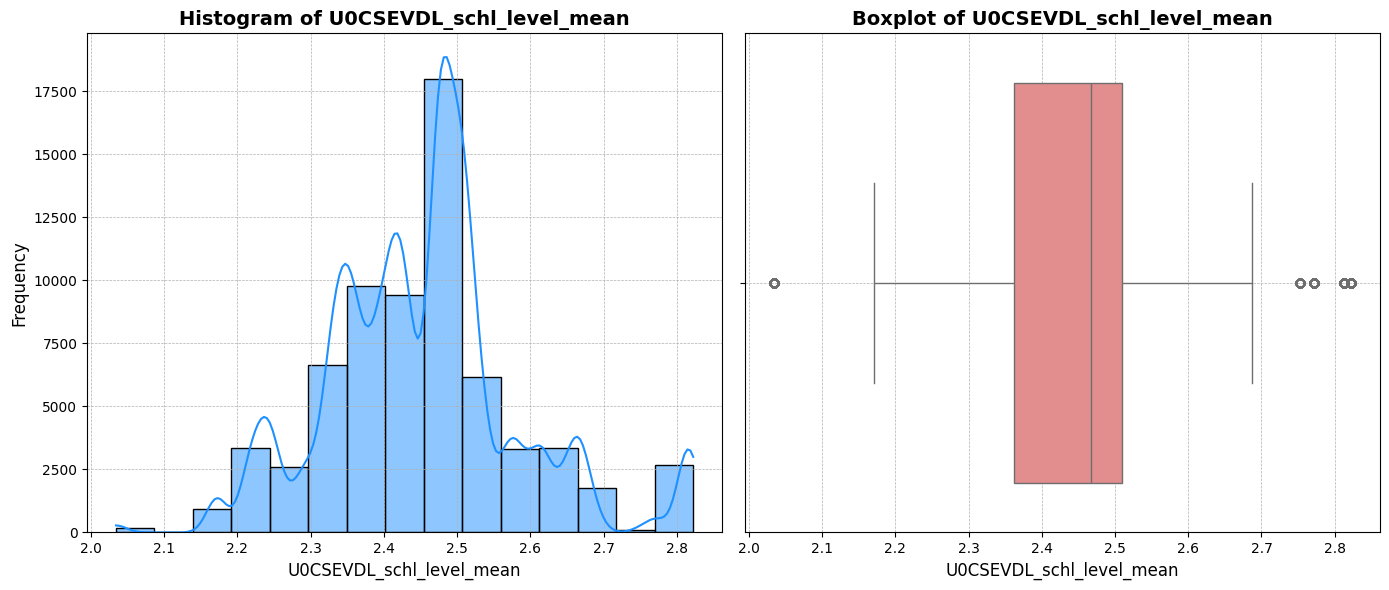



Distribution for: U0CSSAFT_schl_level_mean

Statistics for U0CSSAFT_schl_level_mean:
count    68240.000000
mean         2.815134
std          0.252072
min          2.297650
25%          2.607138
50%          2.792933
75%          3.009604
max          3.421860
Name: U0CSSAFT_schl_level_mean, dtype: float64


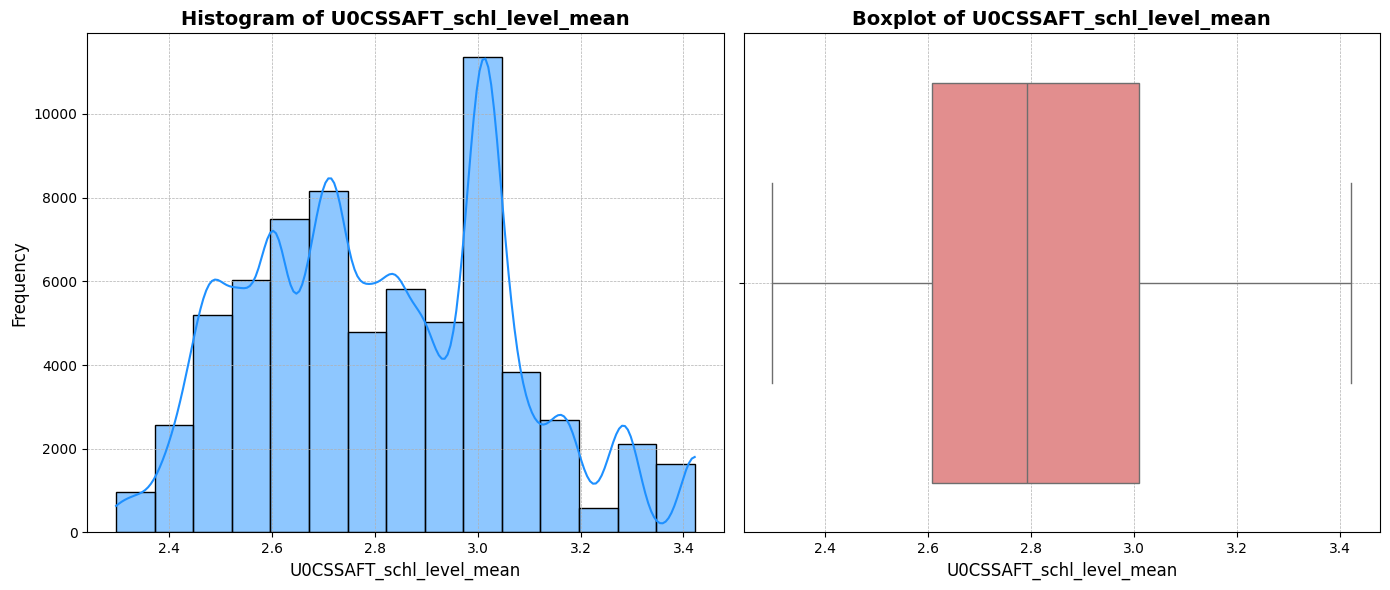



Distribution for: U0CSENGM_schl_level_mean

Statistics for U0CSENGM_schl_level_mean:
count    68240.000000
mean         2.868058
std          0.181443
min          2.467333
25%          2.721966
50%          2.875763
75%          2.997406
max          3.269333
Name: U0CSENGM_schl_level_mean, dtype: float64


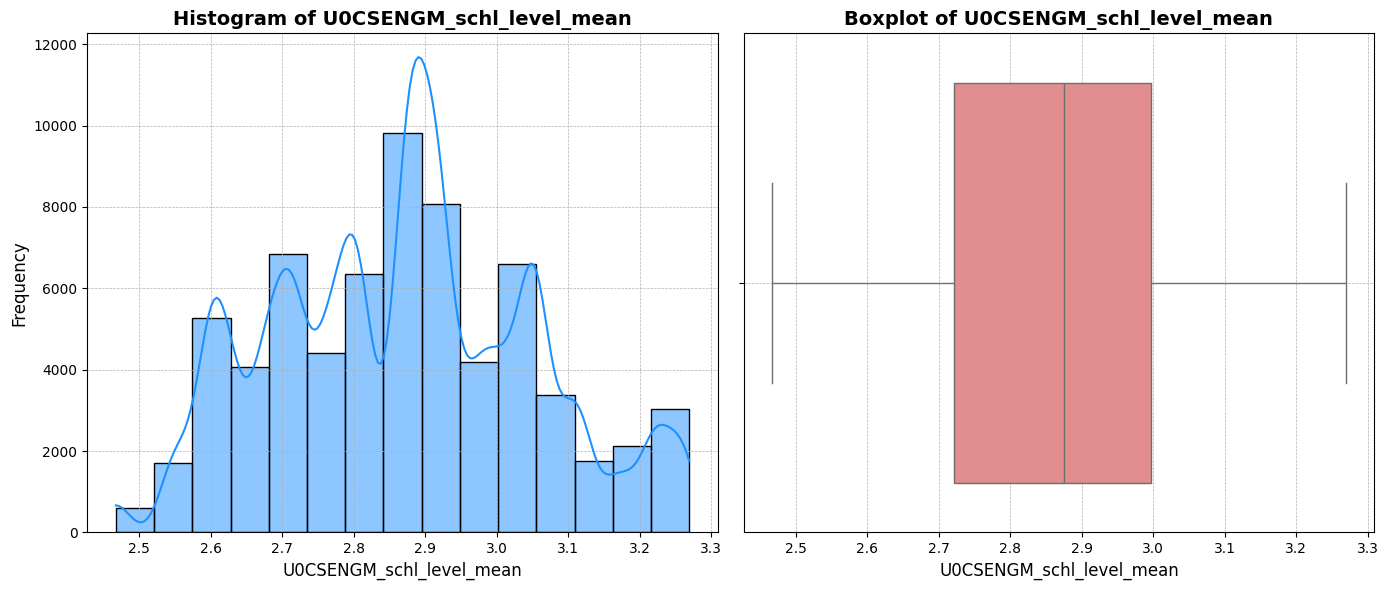



Distribution for: U0CSENVR_schl_level_mean

Statistics for U0CSENVR_schl_level_mean:
count    68240.000000
mean         2.573815
std          0.168936
min          2.154788
25%          2.454605
50%          2.568362
75%          2.676700
max          3.004386
Name: U0CSENVR_schl_level_mean, dtype: float64


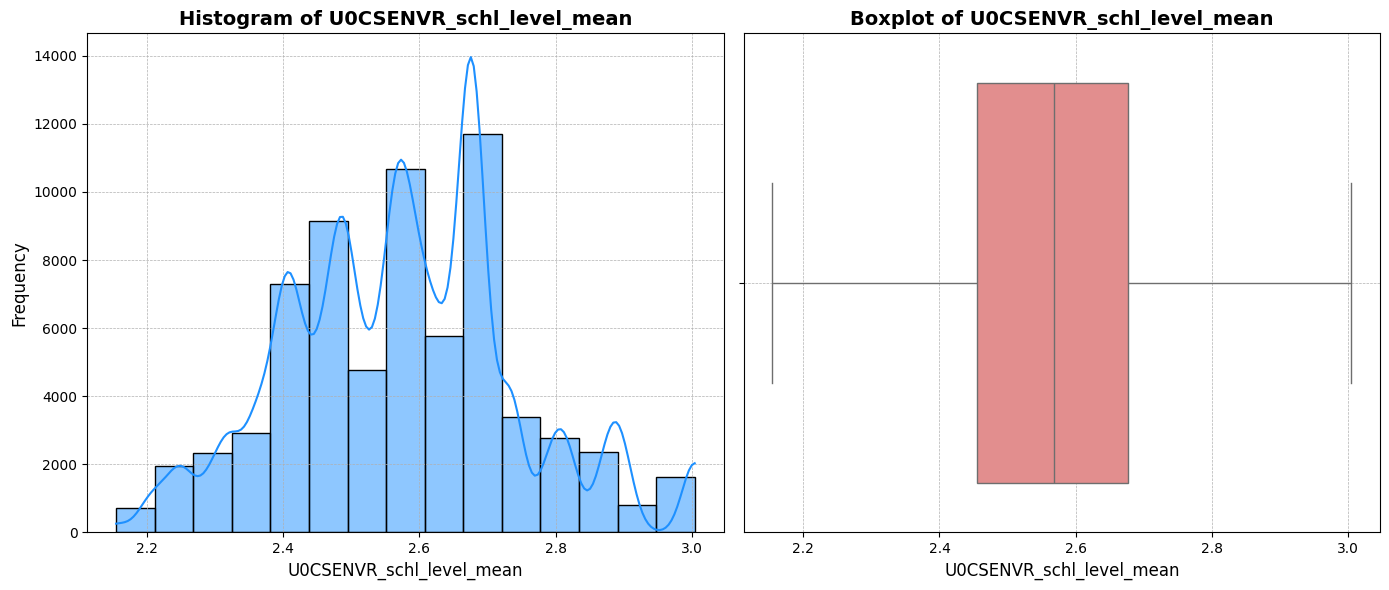

In [5]:
display_mean_distribution(main, school_climate_scores)

Distribution for: U032SUS_P

Statistics for U032SUS_P:
count    68080.000000
mean        11.071690
std          9.726854
min          0.646552
25%          3.881402
50%          9.430439
75%         14.955357
max         66.441006
Name: U032SUS_P, dtype: float64


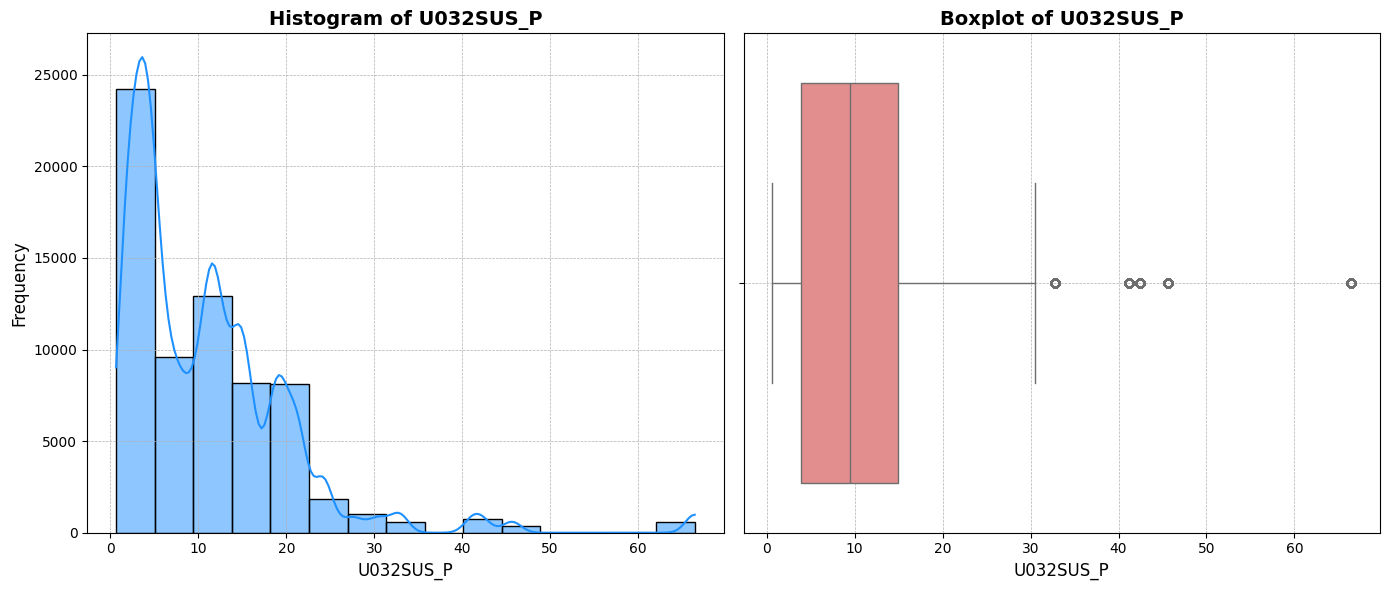



Distribution for: Tenrol

Statistics for Tenrol:
count    68080.000000
mean      1141.108608
std        449.578350
min        326.000000
25%        839.000000
50%       1025.000000
75%       1425.000000
max       2224.000000
Name: Tenrol, dtype: float64


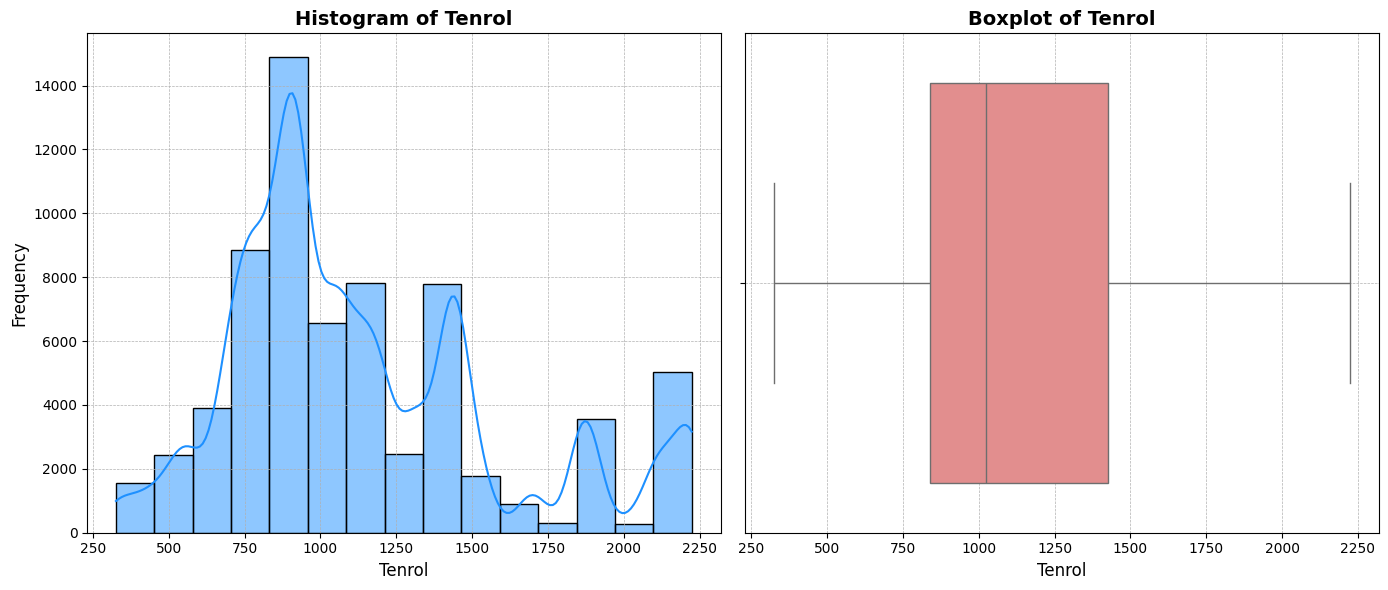



Distribution for: AmIndian

Statistics for AmIndian:
count    68080.000000
mean         3.529113
std          3.587039
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         20.000000
Name: AmIndian, dtype: float64


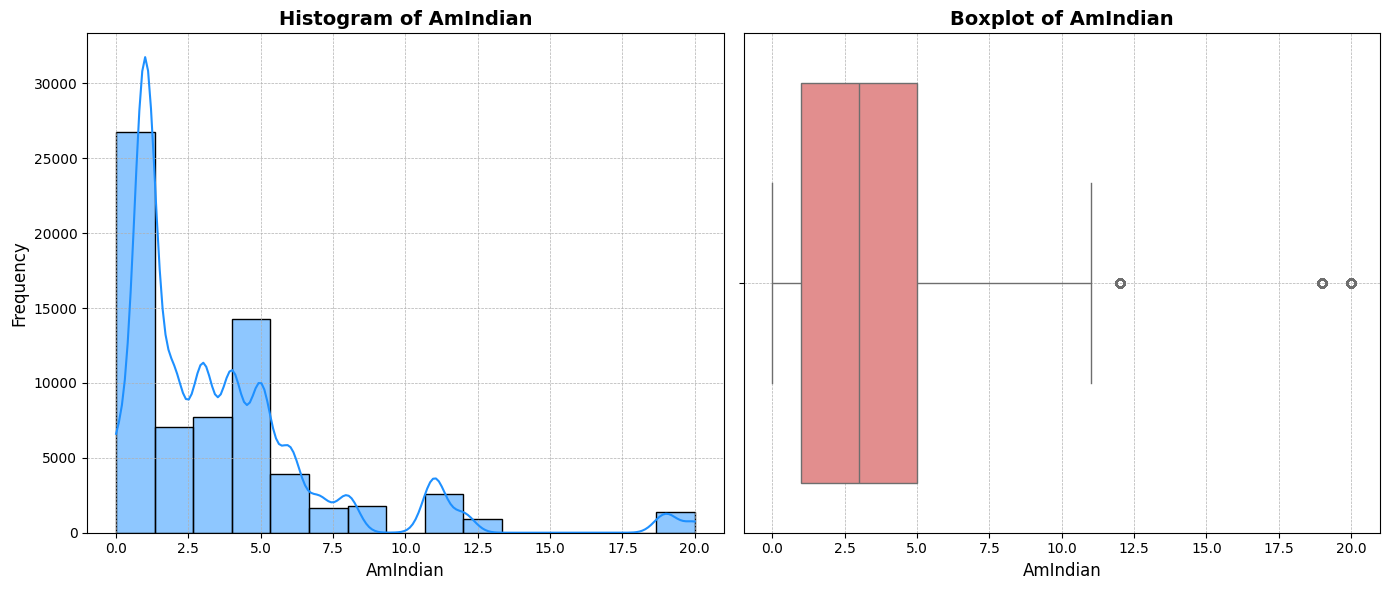



Distribution for: Asian

Statistics for Asian:
count    68080.000000
mean        56.204348
std         54.302104
min          1.000000
25%         22.000000
50%         43.000000
75%         69.000000
max        298.000000
Name: Asian, dtype: float64


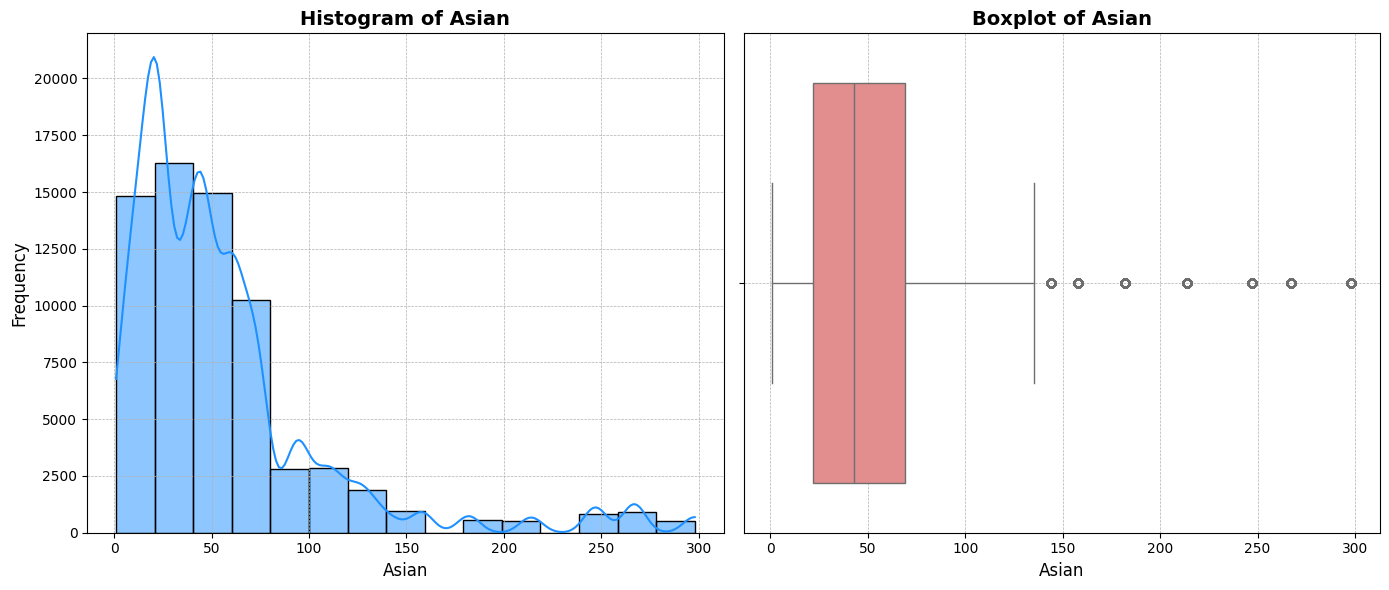



Distribution for: AA

Statistics for AA:
count    68080.000000
mean       306.207462
std        268.835466
min         14.000000
25%        120.000000
50%        227.000000
75%        432.000000
max       1353.000000
Name: AA, dtype: float64


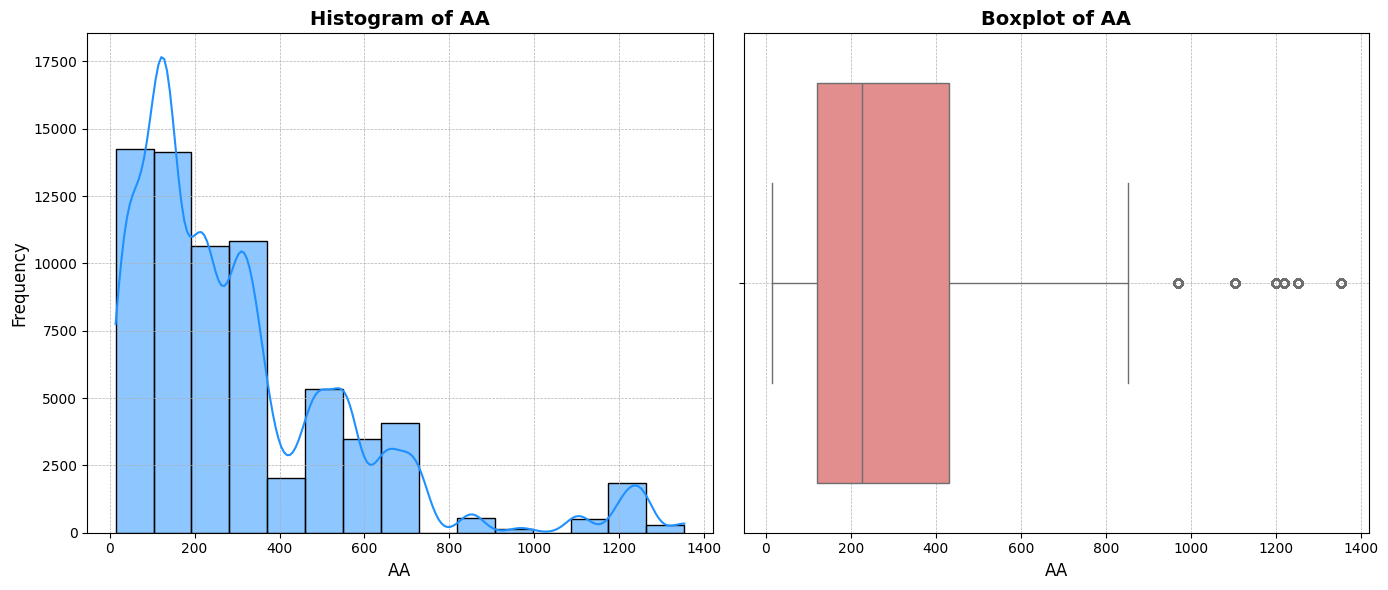



Distribution for: Hispanic

Statistics for Hispanic:
count    68080.000000
mean       118.078364
std        108.061929
min          1.000000
25%         48.000000
50%         71.000000
75%        136.000000
max        484.000000
Name: Hispanic, dtype: float64


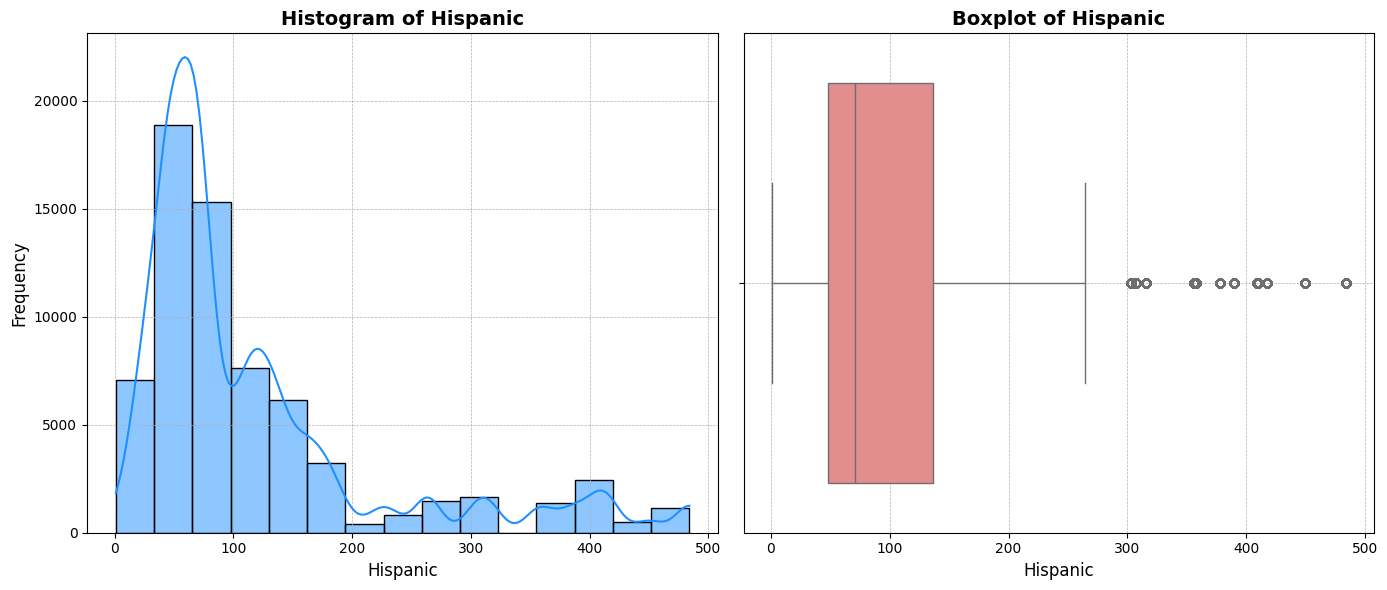



Distribution for: White

Statistics for White:
count    68080.000000
mean       605.811207
std        449.909118
min          9.000000
25%        262.000000
50%        494.000000
75%        893.000000
max       1806.000000
Name: White, dtype: float64


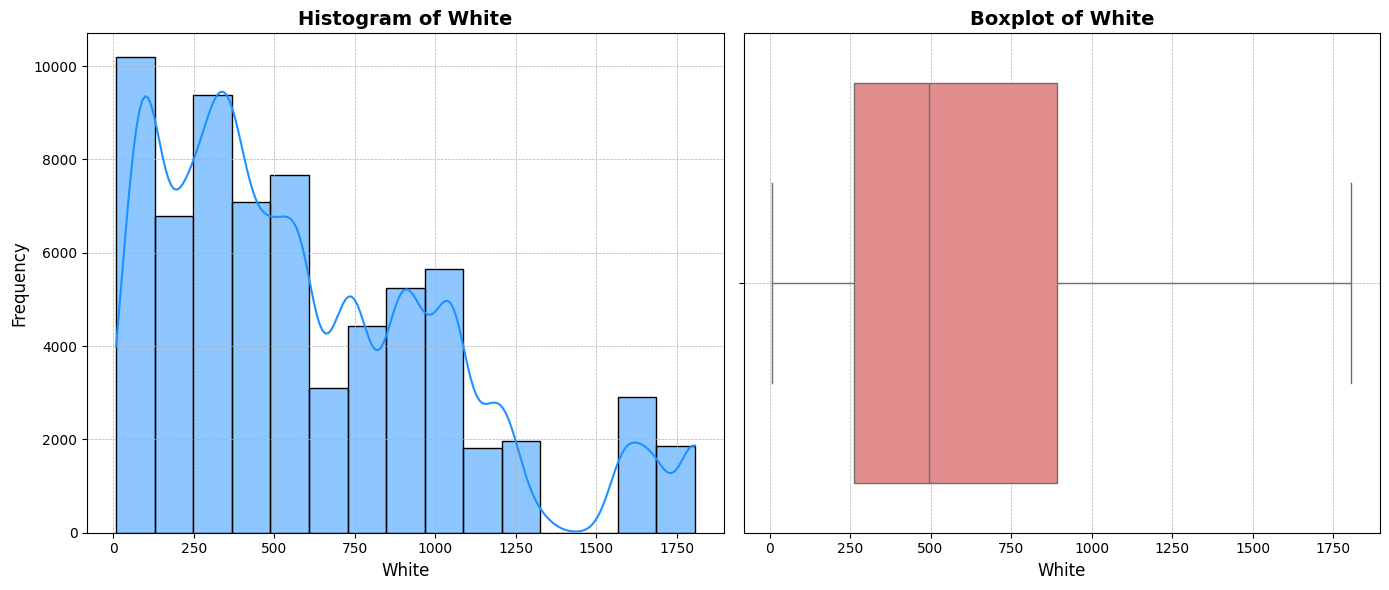



Distribution for: HiPac

Statistics for HiPac:
count    68080.000000
mean         1.762103
std          2.017102
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: HiPac, dtype: float64


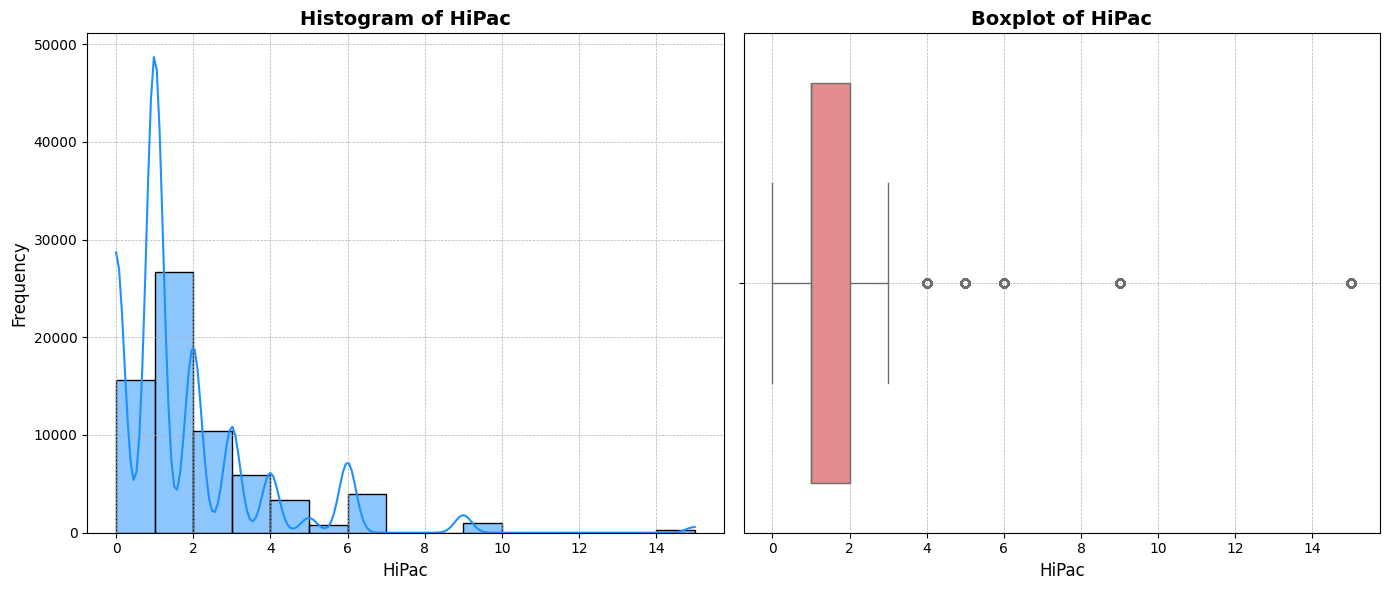



Distribution for: Towmore

Statistics for Towmore:
count    68080.000000
mean        49.269080
std         23.497594
min          9.000000
25%         33.000000
50%         48.000000
75%         61.000000
max        145.000000
Name: Towmore, dtype: float64


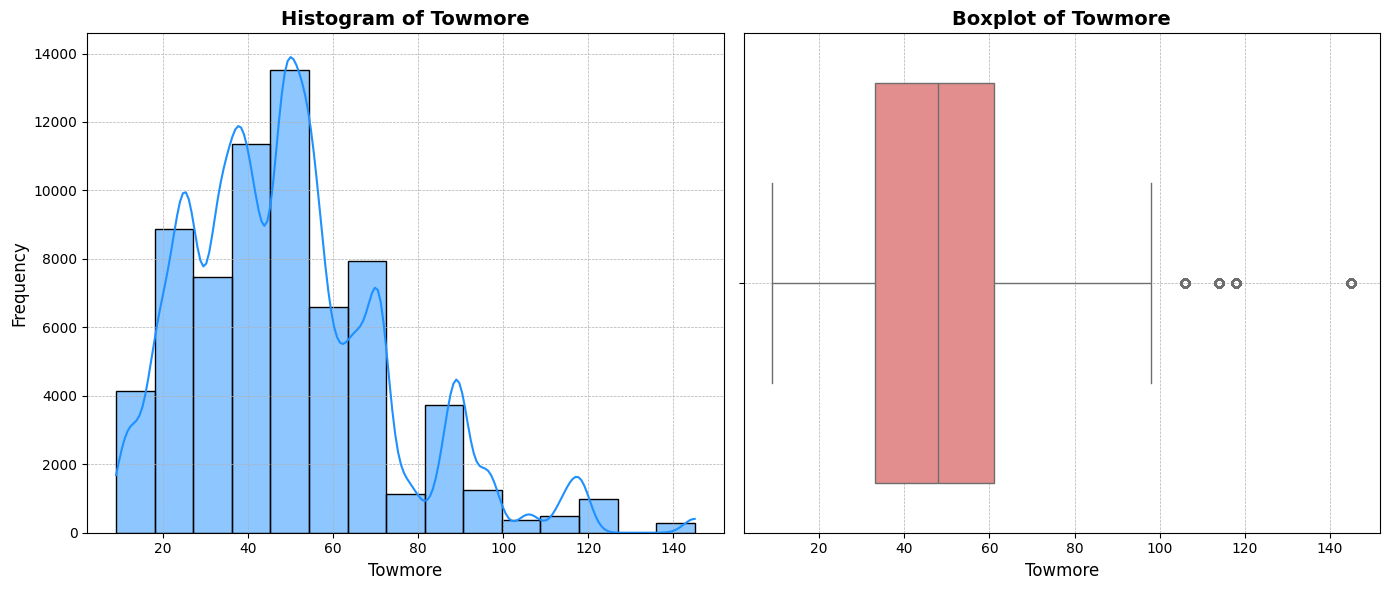



Distribution for: male

Statistics for male:
count    68080.000000
mean       578.649016
std        230.787160
min        158.000000
25%        418.000000
50%        532.000000
75%        720.000000
max       1138.000000
Name: male, dtype: float64


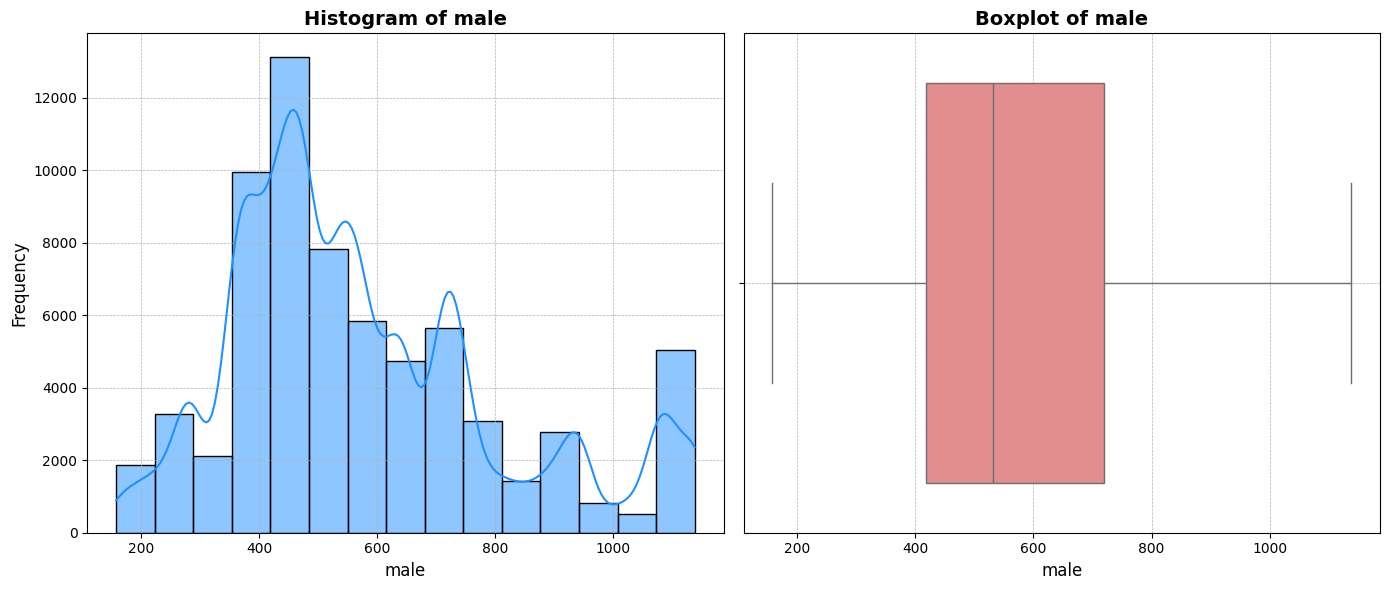



Distribution for: female

Statistics for female:
count    68080.000000
mean       562.517318
std        223.127864
min        155.000000
25%        404.000000
50%        514.000000
75%        695.000000
max       1104.000000
Name: female, dtype: float64


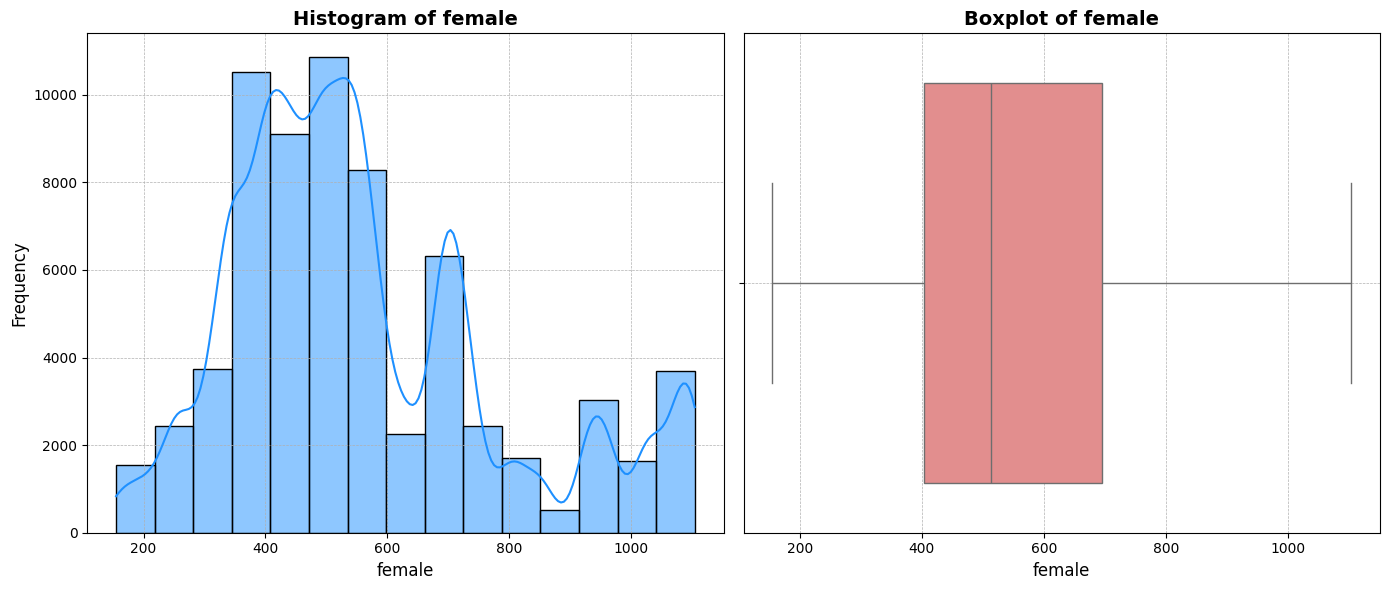

In [6]:
display_mean_distribution(main, other_variables)

In [5]:
df= main[school_labels]
df.head()

,U032SUS_P,Tenrol,AmIndian,Asian,AA,Hispanic,White,HiPac,Towmore,male,...,U0CSENWC_schl_level_mean,U0CSENCL_schl_level_mean,U0CSENPR_schl_level_mean,U0CSEVRC_schl_level_mean,U0CSEVPH_schl_level_mean,U0CSEVSP_schl_level_mean,U0CSEVDL_schl_level_mean,U0CSSAFT_schl_level_mean,U0CSENGM_schl_level_mean,U0CSENVR_schl_level_mean
0,21.550206,1703.0,2.0,54.0,554.0,450.0,589.0,2.0,52.0,854.0,...,2.458333,2.562344,2.585542,2.422333,2.095144,2.646717,2.21373,2.493628,2.674777,2.349574
1,21.550206,1703.0,2.0,54.0,554.0,450.0,589.0,2.0,52.0,854.0,...,2.458333,2.562344,2.585542,2.422333,2.095144,2.646717,2.21373,2.493628,2.674777,2.349574
2,21.550206,1703.0,2.0,54.0,554.0,450.0,589.0,2.0,52.0,854.0,...,2.458333,2.562344,2.585542,2.422333,2.095144,2.646717,2.21373,2.493628,2.674777,2.349574
3,21.550206,1703.0,2.0,54.0,554.0,450.0,589.0,2.0,52.0,854.0,...,2.458333,2.562344,2.585542,2.422333,2.095144,2.646717,2.21373,2.493628,2.674777,2.349574
4,21.550206,1703.0,2.0,54.0,554.0,450.0,589.0,2.0,52.0,854.0,...,2.458333,2.562344,2.585542,2.422333,2.095144,2.646717,2.21373,2.493628,2.674777,2.349574


In [6]:
# missing ratios
df.isnull().mean()

U032SUS_P                   0.020615
Tenrol                      0.020615
AmIndian                    0.020615
Asian                       0.020615
AA                          0.020615
Hispanic                    0.020615
White                       0.020615
HiPac                       0.020615
Towmore                     0.020615
male                        0.020615
female                      0.020615
U0CSRTLT_schl_level_mean    0.018313
U0CSNTRN_schl_level_mean    0.018313
U0CSSAPH_schl_level_mean    0.018313
U0CSSABL_schl_level_mean    0.018313
U0CSSASB_schl_level_mean    0.018313
U0CSENRL_schl_level_mean    0.018313
U0CSENSC_schl_level_mean    0.018313
U0CSENAC_schl_level_mean    0.018313
U0CSENWC_schl_level_mean    0.018313
U0CSENCL_schl_level_mean    0.018313
U0CSENPR_schl_level_mean    0.018313
U0CSEVRC_schl_level_mean    0.018313
U0CSEVPH_schl_level_mean    0.018313
U0CSEVSP_schl_level_mean    0.018313
U0CSEVDL_schl_level_mean    0.018313
U0CSSAFT_schl_level_mean    0.018313
U

In [7]:
# Create a copy of the rows with missing data
missing_schools = main[main.isnull().any(axis=1)].copy()

# Create a new column that lists the column names with missing values
missing_schools['missing_columns'] = missing_schools.apply(
    lambda row: row[row.isnull()].index.tolist(), axis=1
)

# Show the school ID along with the list of columns that are missing
missing_schools[['U031ScID', 'missing_columns']]


,U031ScID,missing_columns
0,1.0,"[U031D15, U031SV8R_2, U031SV17, U031SV18, U031..."
1,1.0,"[U031D15, U031SV8R_2, U031SV17, U031SV18, U031..."
2,1.0,"[U031D15, U031SV8R_2, U031SV17, U031SV18, U031..."
3,1.0,"[U031D15, U031SV8R_2, U031SV17, U031SV18, U031..."
4,1.0,"[U031D6St, U031D15, U031SV8R_2, U031SV17, U031..."
...,...,...
69508,481.0,"[U031D6St, U031SV17, U031SV18, U031SV25, U031S..."
69509,481.0,"[U031D6St, U031SV17, U031SV18, U031SV25, U031S..."
69510,481.0,"[U031SV17, U031SV18, U031SV25, U031SV25R, U031..."
69511,481.0,"[U031SV17, U031SV18, U031SV25, U031SV25R, U031..."


In [8]:

from sklearn.impute import SimpleImputer
import numpy as np

# Let's assume 'main' is your DataFrame
# First, select the numeric columns (you can adjust this if you want to impute all columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create the imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the numeric columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Check the result
print(main.isnull().sum())


U031ID                            0
U031ScID                          0
uberdata                          0
U031SrNm                          0
U031GrNm                          0
                               ... 
U0CSENVR_schl_level_mean       1273
U0CSOVER_schl_level_mean       1273
U031BLL_VCT_schl_level_mean    1273
PrimaryLast                    1273
PrimaryLast1                   1273
Length: 634, dtype: int64


/var/folders/rd/7yk6ngk14y7_v4lcb3mql6n80000gp/T/ipykernel_40527/185884406.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = imputer.fit_transform(df[numeric_cols])


In [9]:
# missing ratios
df.isnull().mean()

U032SUS_P                   0.0
Tenrol                      0.0
AmIndian                    0.0
Asian                       0.0
AA                          0.0
Hispanic                    0.0
White                       0.0
HiPac                       0.0
Towmore                     0.0
male                        0.0
female                      0.0
U0CSRTLT_schl_level_mean    0.0
U0CSNTRN_schl_level_mean    0.0
U0CSSAPH_schl_level_mean    0.0
U0CSSABL_schl_level_mean    0.0
U0CSSASB_schl_level_mean    0.0
U0CSENRL_schl_level_mean    0.0
U0CSENSC_schl_level_mean    0.0
U0CSENAC_schl_level_mean    0.0
U0CSENWC_schl_level_mean    0.0
U0CSENCL_schl_level_mean    0.0
U0CSENPR_schl_level_mean    0.0
U0CSEVRC_schl_level_mean    0.0
U0CSEVPH_schl_level_mean    0.0
U0CSEVSP_schl_level_mean    0.0
U0CSEVDL_schl_level_mean    0.0
U0CSSAFT_schl_level_mean    0.0
U0CSENGM_schl_level_mean    0.0
U0CSENVR_schl_level_mean    0.0
dtype: float64

In [10]:
# dimension of the df
df.shape

(69513, 29)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

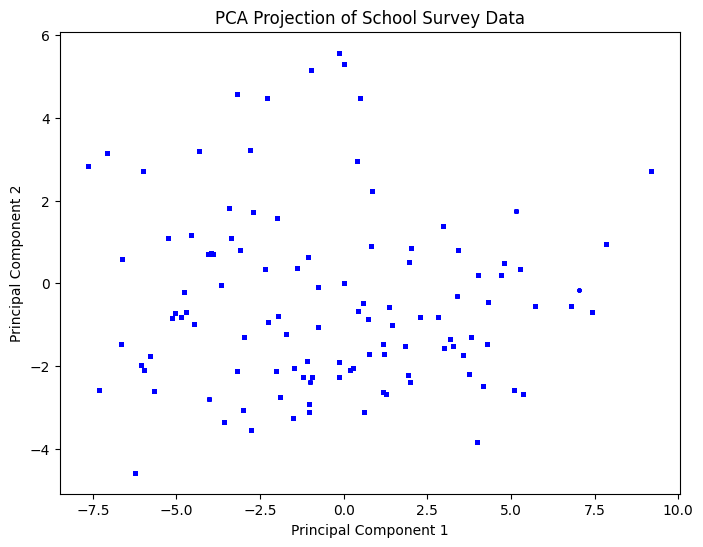

In [ ]:


# Reduce dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# If using sampled data:
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            s=5, alpha=0.5, c='blue')  # s=5 => marker size

# If plotting all data:
# plt.scatter(data_pca[:, 0], data_pca[:, 1], s=1, alpha=0.5, c='blue')

plt.title('PCA Projection of School Survey Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [14]:

from sklearn.cluster import KMeans

k_values = range(2, 11)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)
    print(f"Clusters: {k}, Inertia: {kmeans.inertia_:.2f}")


Clusters: 2, Inertia: 1361224.75
Clusters: 3, Inertia: 1131354.89
Clusters: 4, Inertia: 939409.42
Clusters: 5, Inertia: 874963.39
Clusters: 6, Inertia: 828411.90
Clusters: 7, Inertia: 777599.43
Clusters: 8, Inertia: 709920.48
Clusters: 9, Inertia: 665611.92
Clusters: 10, Inertia: 640538.18


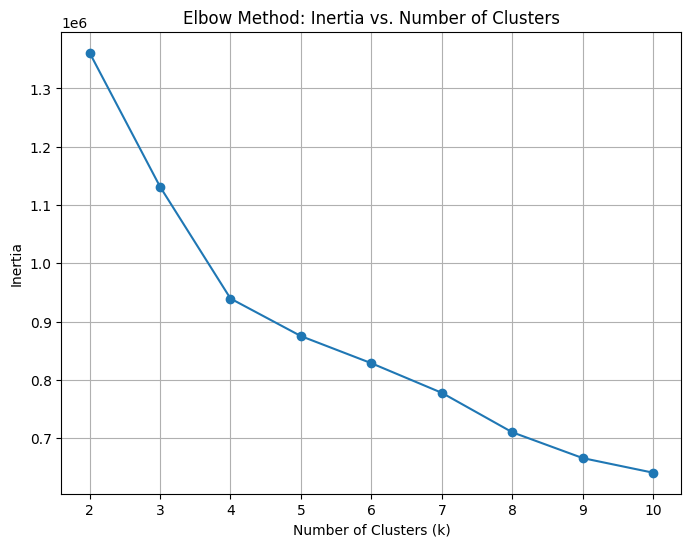

In [15]:
# Interpretation: Look for a point where the inertia’s decrease levels off (the “elbow”). 
# This is a candidate for the optimal number of clusters.

plt.figure(figsize=(8, 6))
plt.plot(list(k_values), inertias, marker='o')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(list(k_values))
plt.grid(True)
plt.show()


In [16]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(score)
    print(f"Clusters: {k}, Silhouette Score: {score:.3f}")

# after 3 clusters, scores reduce!


Clusters: 2, Silhouette Score: 0.279
Clusters: 3, Silhouette Score: 0.280
Clusters: 4, Silhouette Score: 0.254
Clusters: 5, Silhouette Score: 0.241
Clusters: 6, Silhouette Score: 0.222
Clusters: 7, Silhouette Score: 0.246
Clusters: 8, Silhouette Score: 0.251
Clusters: 9, Silhouette Score: 0.240
Clusters: 10, Silhouette Score: 0.245


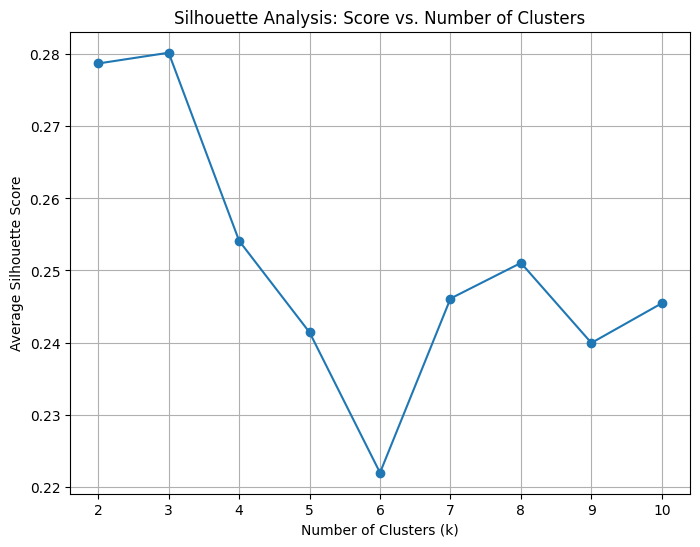

In [17]:
#Interpretation: The kk with the highest average silhouette score is often a good choice. 
# Compare this with your elbow plot to decide.


plt.figure(figsize=(8, 6))
plt.plot(list(k_values), silhouette_scores, marker='o')
plt.title('Silhouette Analysis: Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(list(k_values))
plt.grid(True)
plt.show()


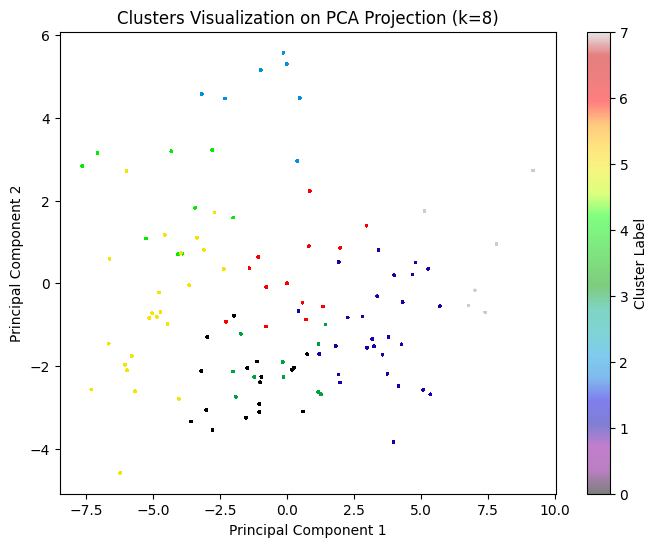

In [18]:
# Optimal number of clusters = let's pick the widest clusters

optimal_k = 8 # as the second peak

kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_opt.fit_predict(data_scaled)

# Visualize using the whole PCA data (no sampling)
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=cluster_labels, cmap='nipy_spectral', s=1, alpha=0.5)
plt.title(f'Clusters Visualization on PCA Projection (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# so mixed, patterns cannot be identified fro the pattern

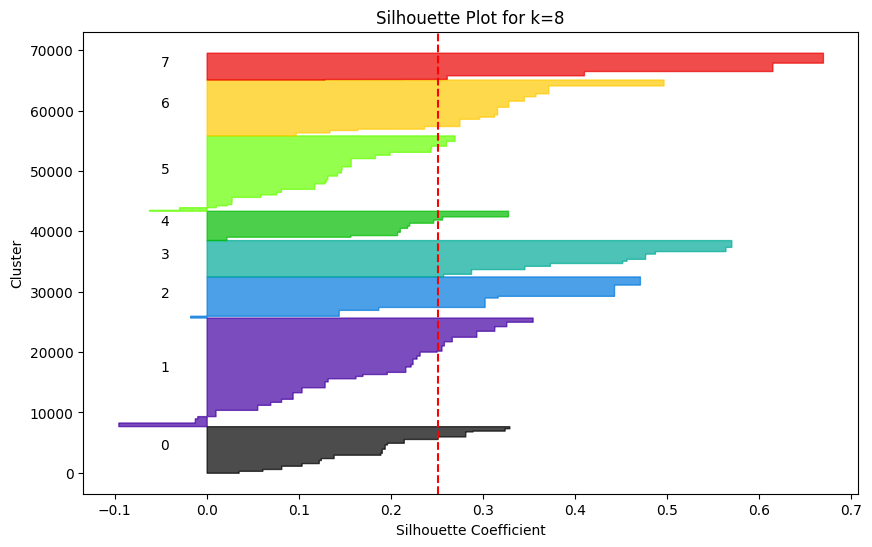

In [19]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

# Calculate silhouette values for all samples in the full dataset
silhouette_values = silhouette_samples(data_scaled, cluster_labels)

plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(optimal_k):
    # Select the silhouette scores for samples in cluster i and sort them
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    # Choose a color for the cluster based on its index
    color = cm.nipy_spectral(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Add space between clusters

plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.title(f'Silhouette Plot for k={optimal_k}')
plt.axvline(x=np.mean(silhouette_values), color="red", linestyle="--")
plt.show()


In [20]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Compute Silhouette Score (ranges from -1 to 1; higher is better)
sil_score = silhouette_score(data_scaled, cluster_labels)
print(f"Silhouette Score: {sil_score:.3f}")

# Compute Calinski-Harabasz Index (higher values indicate better clusters)
ch_score = calinski_harabasz_score(data_scaled, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_score:.3f}")

# Compute Davies-Bouldin Index (lower values indicate better clusters)
db_score = davies_bouldin_score(data_scaled, cluster_labels)
print(f"Davies-Bouldin Index: {db_score:.3f}")

# If you want to see the inertia from the KMeans model (within-cluster sum of squares)
inertia = kmeans_opt.inertia_
print(f"Inertia: {inertia:.3f}")


Silhouette Score: 0.251
Calinski-Harabasz Index: 18265.729
Davies-Bouldin Index: 1.473
Inertia: 709920.484


How to Interpret These Metrics:

Silhouette Score:

- Values near +1 indicate that the samples are far away from the neighboring clusters.
- Values around 0 indicate overlapping clusters.
- Negative values indicate that samples might have been assigned to the wrong clusters.

Calinski-Harabasz Index:
- A higher score generally indicates better-defined clusters.

Davies-Bouldin Index:
- A lower score indicates that clusters are compact and well separated.

Inertia:
- Lower inertia values are preferable, but inertia tends to decrease with a higher number of clusters. Use it along with the elbow method.

These metrics, when used together, provide a more complete picture of your clustering solution's quality.

# Updating cluster sizes

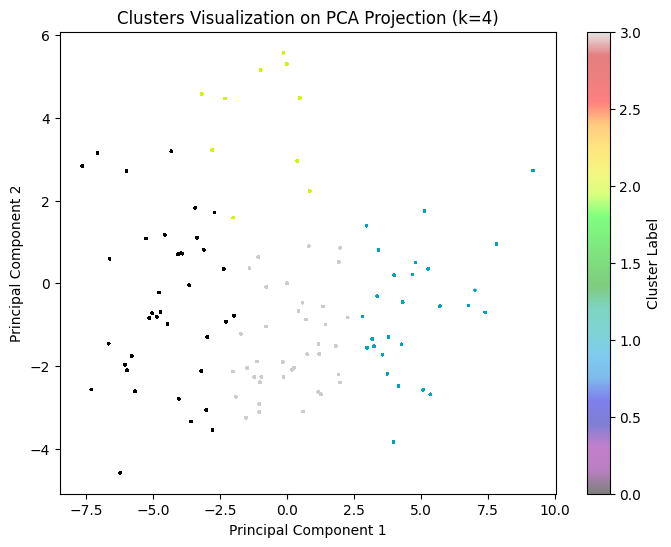

In [21]:
# let's check out 4 clusters
optimal_k = 4
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_opt.fit_predict(data_scaled)

# Visualize using the whole PCA data (no sampling)
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=cluster_labels, cmap='nipy_spectral', s=1, alpha=0.5)
plt.title(f'Clusters Visualization on PCA Projection (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

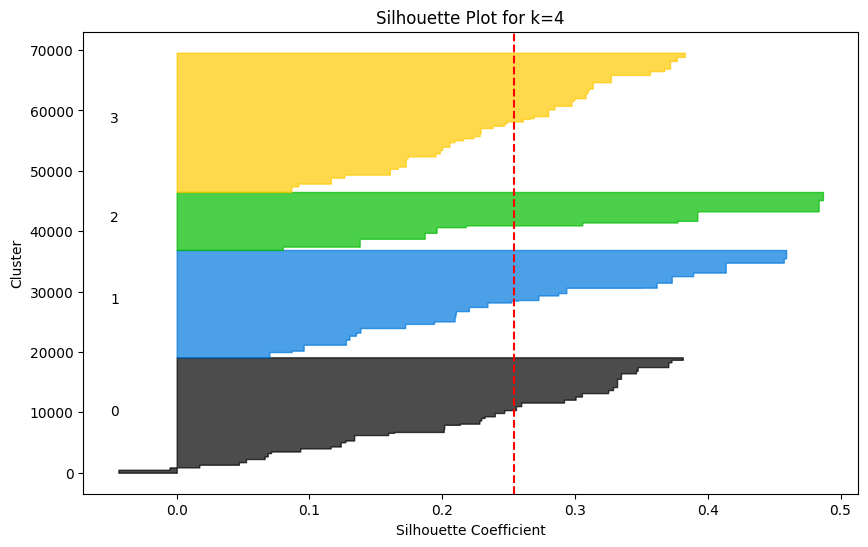

In [22]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

# Calculate silhouette values for all samples in the full dataset
silhouette_values = silhouette_samples(data_scaled, cluster_labels)

plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(optimal_k):
    # Select the silhouette scores for samples in cluster i and sort them
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    # Choose a color for the cluster based on its index
    color = cm.nipy_spectral(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Add space between clusters

plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.title(f'Silhouette Plot for k={optimal_k}')
plt.axvline(x=np.mean(silhouette_values), color="red", linestyle="--")
plt.show()


In [23]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Compute Silhouette Score (ranges from -1 to 1; higher is better)
sil_score = silhouette_score(data_scaled, cluster_labels)
print(f"Silhouette Score: {sil_score:.3f}")

# Compute Calinski-Harabasz Index (higher values indicate better clusters)
ch_score = calinski_harabasz_score(data_scaled, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_score:.3f}")

# Compute Davies-Bouldin Index (lower values indicate better clusters)
db_score = davies_bouldin_score(data_scaled, cluster_labels)
print(f"Davies-Bouldin Index: {db_score:.3f}")

# If you want to see the inertia from the KMeans model (within-cluster sum of squares)
inertia = kmeans_opt.inertia_
print(f"Inertia: {inertia:.3f}")


Silhouette Score: 0.254
Calinski-Harabasz Index: 26550.080
Davies-Bouldin Index: 1.363
Inertia: 939409.419


# Final Model

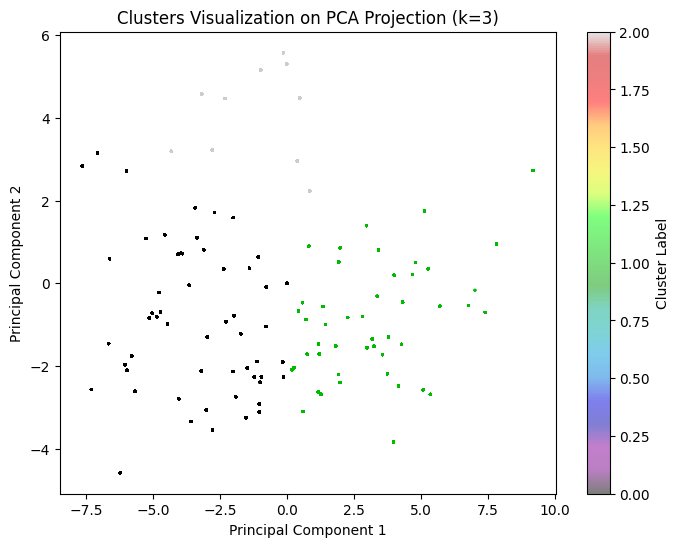

In [24]:
# 4 is still worse, let's try 3
optimal_k = 3
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_opt.fit_predict(data_scaled)

# Visualize using the whole PCA data (no sampling)
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=cluster_labels, cmap='nipy_spectral', s=1, alpha=0.5)
plt.title(f'Clusters Visualization on PCA Projection (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

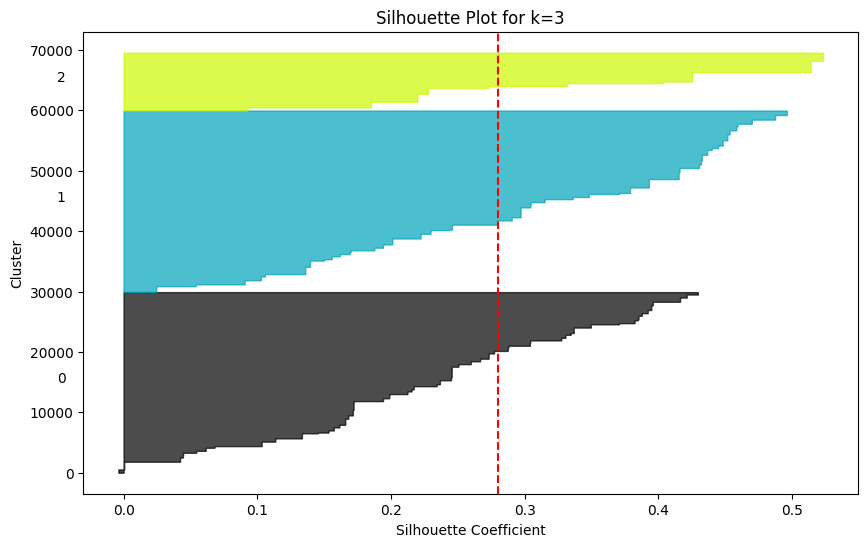

In [25]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

# Calculate silhouette values for all samples in the full dataset
silhouette_values = silhouette_samples(data_scaled, cluster_labels)

plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(optimal_k):
    # Select the silhouette scores for samples in cluster i and sort them
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    # Choose a color for the cluster based on its index
    color = cm.nipy_spectral(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Add space between clusters

plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.title(f'Silhouette Plot for k={optimal_k}')
plt.axvline(x=np.mean(silhouette_values), color="red", linestyle="--")
plt.show()


In [26]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Compute Silhouette Score (ranges from -1 to 1; higher is better)
sil_score = silhouette_score(data_scaled, cluster_labels)
print(f"Silhouette Score: {sil_score:.3f}")

# Compute Calinski-Harabasz Index (higher values indicate better clusters)
ch_score = calinski_harabasz_score(data_scaled, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_score:.3f}")

# Compute Davies-Bouldin Index (lower values indicate better clusters)
db_score = davies_bouldin_score(data_scaled, cluster_labels)
print(f"Davies-Bouldin Index: {db_score:.3f}")

# If you want to see the inertia from the KMeans model (within-cluster sum of squares)
inertia = kmeans_opt.inertia_
print(f"Inertia: {inertia:.3f}")


Silhouette Score: 0.280
Calinski-Harabasz Index: 27172.345
Davies-Bouldin Index: 1.293
Inertia: 1131354.892


# Other Clustering approaches

## HBDSCAN

HDBSCAN Silhouette Score (ignoring noise): 1.000


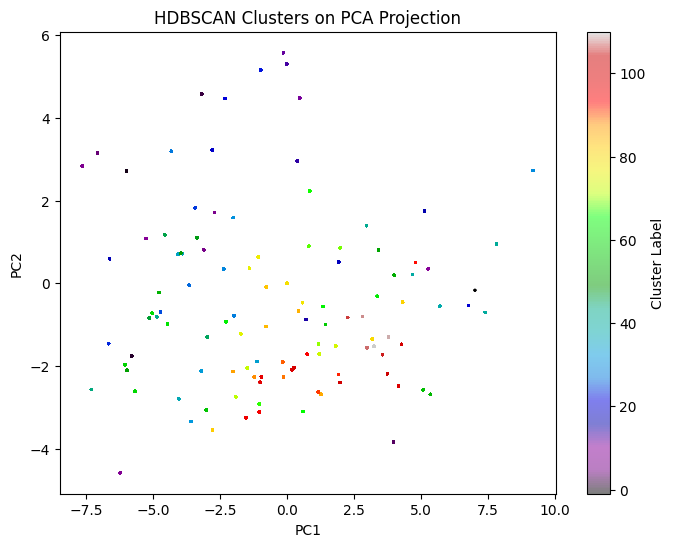

In [27]:
import hdbscan
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Create an HDBSCAN clusterer (adjust parameters as needed)
clusterer = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=5)
cluster_labels_hdbscan = clusterer.fit_predict(data_scaled)

# Evaluate: HDBSCAN often labels noise as -1. To compute silhouette, you might need to filter these out.
valid_idx = cluster_labels_hdbscan != -1
if sum(valid_idx) > 0:
    sil_score_hdbscan = silhouette_score(data_scaled[valid_idx], cluster_labels_hdbscan[valid_idx])
    print(f"HDBSCAN Silhouette Score (ignoring noise): {sil_score_hdbscan:.3f}")
else:
    print("No clusters found (all points labeled as noise).")

# Visualize clusters in PCA space
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1], c=cluster_labels_hdbscan, cmap='nipy_spectral', s=1, alpha=0.5)
plt.title('HDBSCAN Clusters on PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')
plt.show()


Why HDBSCAN?
HDBSCAN can detect clusters based on density, is robust to noise, and does not require you to pre-define the number of clusters. This flexibility is useful when your clusters are not well-separated or when there are gradual transitions between groups.

In [28]:
import numpy as np

labels = clusterer.labels_  # from your HDBSCAN model
unique_labels = set(labels)

if -1 in unique_labels:
    # -1 is noise
    n_clusters = len(unique_labels) - 1
else:
    n_clusters = len(unique_labels)

print(f"Number of clusters (excluding noise): {n_clusters}")


Number of clusters (excluding noise): 111


In [29]:
noise_points = np.sum(labels == -1)
print(f"Number of noise points: {noise_points}")


Number of noise points: 10


Increase min_cluster_size:
By setting a larger minimum cluster size (for example, 5, 10, or higher), you force HDBSCAN to only form a cluster if at least that many schools are very similar. This can help merge schools that are close in the feature space into one cluster rather than isolating them.

Adjust min_samples:
Increasing min_samples can also raise the density threshold, so only schools with a higher level of similarity form clusters. Experiment with this value to see its impact on the clustering outcome.

Use the Condensed Tree Visualization:
HDBSCAN provides a condensed tree that shows the cluster hierarchy. You can use the tree to choose a different cut (using the cluster_selection_epsilon parameter) which may merge clusters at a higher level.

In [30]:
import hdbscan


clusterer = hdbscan.HDBSCAN(min_cluster_size=25, min_samples=10)
clusterer.fit(data_scaled)
print("Number of clusters (excluding noise):", len(set(clusterer.labels_)) - (1 if -1 in clusterer.labels_ else 0))

# model exactly identified number of schools while I did not provide school ids..


Number of clusters (excluding noise): 111


/Users/qge5yv/miniforge3/envs/p310/lib/python3.10/site-packages/hdbscan/plots.py:383: UserWarning: Infinite lambda values encountered in chosen clusters. This might be due to duplicates in the data.
  warn('Infinite lambda values encountered in chosen clusters.'


<Axes: ylabel='$\\lambda$ value'>

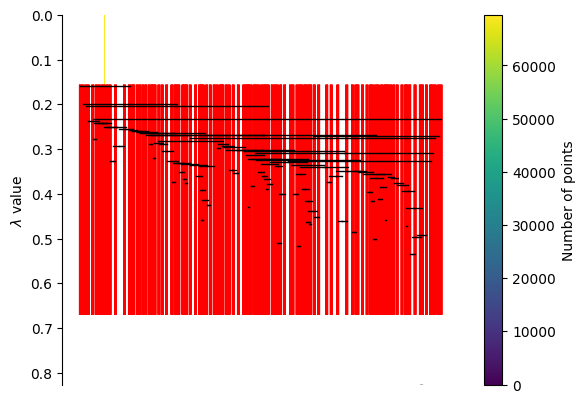

In [31]:
# Plot the condensed tree for insight
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette='viridis')


## Agglomerative

Why Agglomerative Clustering?
This method builds a hierarchy of clusters. Using linkage methods like "ward" (which minimizes variance within clusters) can sometimes reveal natural groupings even when differences are subtle.

In [32]:
# let's test the k-means 3 clusters first


import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# and you want 3 clusters (change as needed)
n_clusters = 3

# Create and fit the Agglomerative Clustering model
agg_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agg_model.fit_predict(data_scaled)

# Determine the actual number of clusters (in case some algorithms produce fewer)
unique_labels = np.unique(labels)
print("Number of clusters:", len(unique_labels))

# Compute clustering metrics
sil_score = silhouette_score(data_scaled, labels)
ch_score = calinski_harabasz_score(data_scaled, labels)
db_score = davies_bouldin_score(data_scaled, labels)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Calinski-Harabasz Index: {ch_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")


Number of clusters: 3
Silhouette Score: 0.210
Calinski-Harabasz Index: 25218.891
Davies-Bouldin Index: 1.659


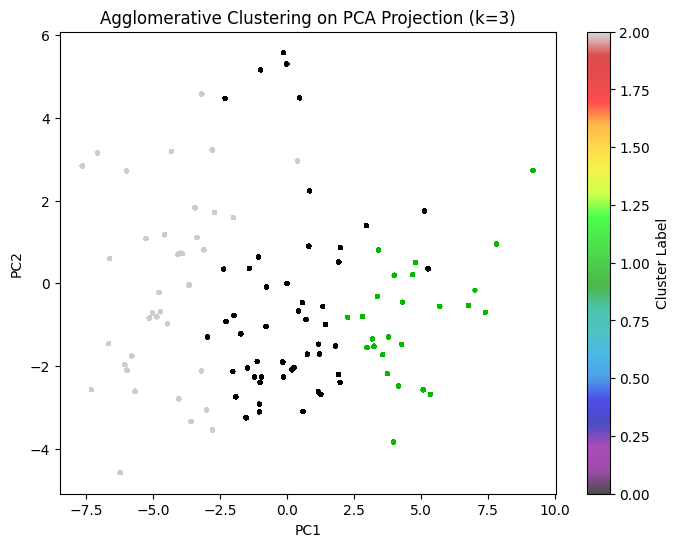

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels, cmap='nipy_spectral', s=5, alpha=0.7)
plt.title(f'Agglomerative Clustering on PCA Projection (k={n_clusters})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')
plt.show()


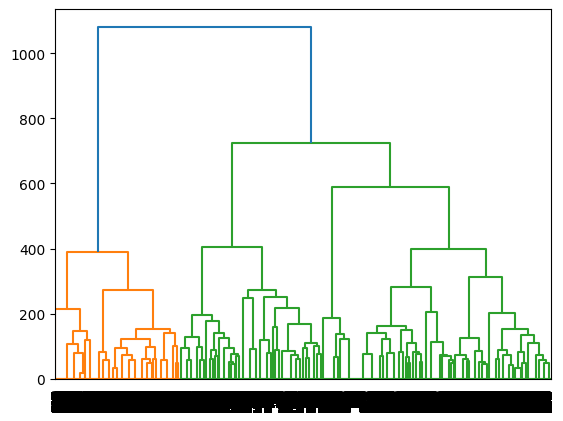

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data_scaled, method='ward')
dendrogram(Z)
plt.show()


Using a Dendrogram:
You can compute the linkage matrix using functions like scipy.cluster.hierarchy.linkage and then plot a dendrogram. By looking for a big vertical gap (the "elbow" in the dendrogram), you can decide on a natural number of clusters.

In [35]:
from scipy.cluster.hierarchy import inconsistent, linkage
Z = linkage(data_scaled, method='ward')
# Pass depth as a positional argument
incons = inconsistent(Z, 2)
incons 

array([[  0.        ,   0.        ,   1.        ,   0.        ],
       [  0.        ,   0.        ,   2.        ,   0.        ],
       [  0.        ,   0.        ,   2.        ,   0.        ],
       ...,
       [391.85975917, 200.71739324,   3.        ,   0.98118653],
       [573.39532667, 160.45898564,   3.        ,   0.9485324 ],
       [732.24375772, 345.6159617 ,   3.        ,   1.00947869]])

In [36]:
from scipy.cluster.hierarchy import fcluster

# Choose a threshold for the inconsistency coefficient (e.g., 2.0)
threshold = 2
# This will assign cluster labels based on whether a merge’s inconsistency is below or above the threshold
clusters = fcluster(Z, t=threshold, criterion='inconsistent')
print("Number of clusters:", len(np.unique(clusters)))

# results = sucks


Number of clusters: 1


In [37]:
# Using the inconsistency criterion with different thresholds:
for thresh in [0.25, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]:
    clusters = fcluster(Z, t=thresh, criterion='inconsistent')
    unique_clusters = np.unique(clusters)
    print(f"Threshold: {thresh}, Number of clusters: {len(unique_clusters)}")

    # results = still sucks, this metric does mot make sense


Threshold: 0.25, Number of clusters: 112
Threshold: 0.5, Number of clusters: 112
Threshold: 1.0, Number of clusters: 112
Threshold: 1.5, Number of clusters: 1
Threshold: 2.0, Number of clusters: 1
Threshold: 2.5, Number of clusters: 1
Threshold: 3.0, Number of clusters: 1


In [38]:
# let's try fcluster, the aim is to find greater gaps between clusters
from scipy.cluster.hierarchy import fcluster

# Using a distance threshold = based on above plot, let's test 450, we can get 4 clusters
clusters = fcluster(Z, t=450, criterion='distance')
unique_clusters = np.unique(clusters)
print("Number of clusters (distance threshold):", len(unique_clusters))


Number of clusters (distance threshold): 4


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Suppose your standardized data is in 'data_scaled'
# and you want 3 clusters (change as needed)
n_clusters = 4

# Create and fit the Agglomerative Clustering model
agg_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agg_model.fit_predict(data_scaled)

# Determine the actual number of clusters (in case some algorithms produce fewer)
unique_labels = np.unique(labels)
print("Number of clusters:", len(unique_labels))

# Compute clustering metrics
sil_score = silhouette_score(data_scaled, labels)
ch_score = calinski_harabasz_score(data_scaled, labels)
db_score = davies_bouldin_score(data_scaled, labels)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Calinski-Harabasz Index: {ch_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")


Number of clusters: 4
Silhouette Score: 0.239
Calinski-Harabasz Index: 23778.761
Davies-Bouldin Index: 1.384


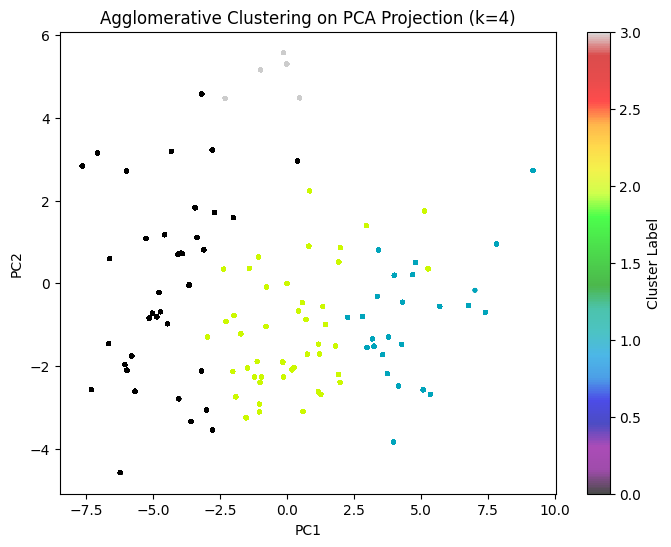

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels, cmap='nipy_spectral', s=5, alpha=0.7)
plt.title(f'Agglomerative Clustering on PCA Projection (k={n_clusters})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')
plt.show()

In [41]:
# above results are worse than than k-means 3 cluster results, so let's try 600, where again will come up with 3 clusters


from scipy.cluster.hierarchy import fcluster

# Using a distance threshold
clusters = fcluster(Z, t=600, criterion='distance')
unique_clusters = np.unique(clusters)
print("Number of clusters (distance threshold):", len(unique_clusters))

Number of clusters (distance threshold): 3


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# and you want 3 clusters (change as needed)
n_clusters = 3

# Create and fit the Agglomerative Clustering model
agg_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agg_model.fit_predict(data_scaled)

# Determine the actual number of clusters (in case some algorithms produce fewer)
unique_labels = np.unique(labels)
print("Number of clusters:", len(unique_labels))

# Compute clustering metrics
sil_score = silhouette_score(data_scaled, labels)
ch_score = calinski_harabasz_score(data_scaled, labels)
db_score = davies_bouldin_score(data_scaled, labels)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Calinski-Harabasz Index: {ch_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")

# results = worse than k-means 3 cluster results, so better to stick with 4 clusters

Number of clusters: 3
Silhouette Score: 0.210
Calinski-Harabasz Index: 25218.891
Davies-Bouldin Index: 1.659


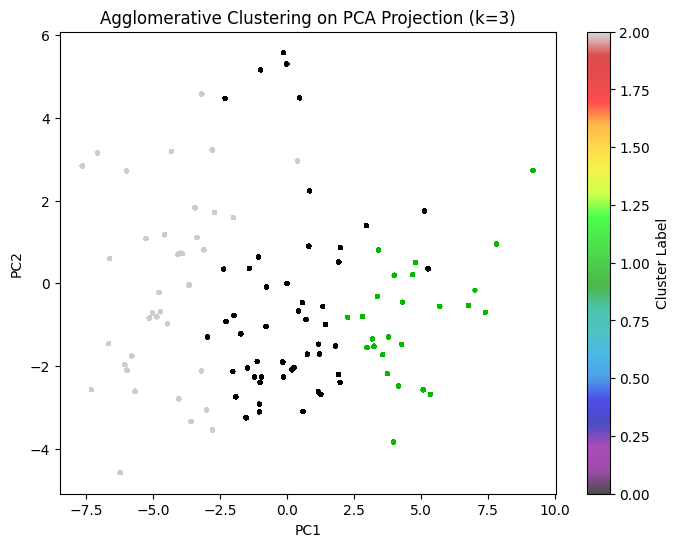

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels, cmap='nipy_spectral', s=5, alpha=0.7)
plt.title(f'Agglomerative Clustering on PCA Projection (k={n_clusters})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')
plt.show()

## GaussianMixture

Why GMM?
GMMs assume that data points are generated from a mixture of Gaussian distributions. They can model overlapping clusters by providing probabilities for cluster membership, which might be a better fit when your differences are subtle.

GMM Silhouette Score: 0.278


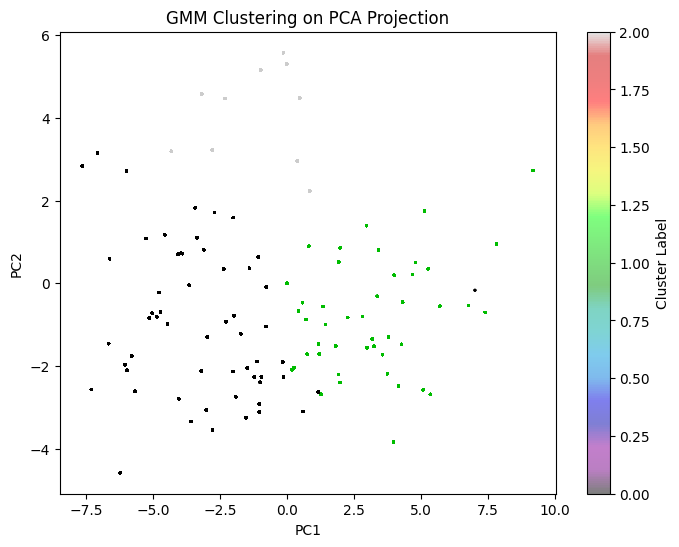

In [44]:
# let's start with k=3 as the k-means baseline clusters


from sklearn.mixture import GaussianMixture

# For example, trying 3 components:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)

sil_score_gmm = silhouette_score(data_scaled, gmm_labels)
print(f"GMM Silhouette Score: {sil_score_gmm:.3f}")

plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1], c=gmm_labels, cmap='nipy_spectral', s=1, alpha=0.5)
plt.title('GMM Clustering on PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')
plt.show()


### Determine the Optimal Number of Clusters

Using BIC or AIC

One standard approach for GMMs is to fit multiple models with different numbers of components (e.g., 2 to 10) and compute the Bayesian Information Criterion (BIC) or Akaike Information Criterion (AIC). Both penalize model complexity, helping you choose the “best” number of components.

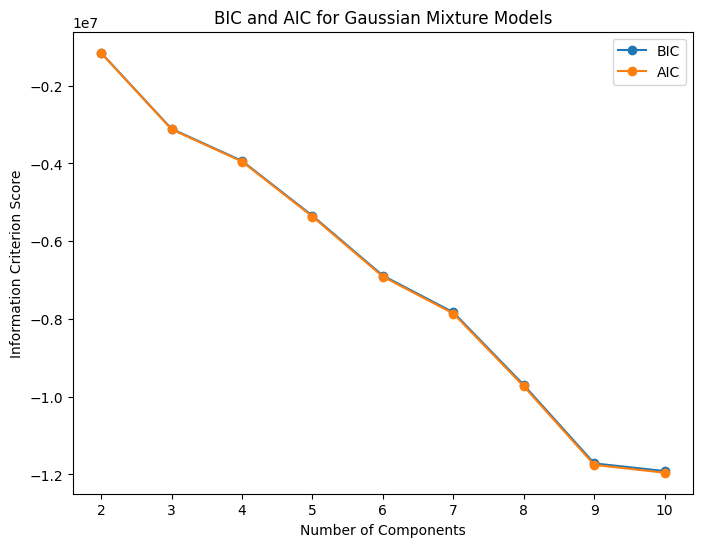

Best GMM by BIC has 10 components.
Best GMM by AIC has 10 components.


In [45]:
lowest_bic = np.infty
lowest_aic = np.infty
bic_scores = []
aic_scores = []
n_components_range = range(2, 11)

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(data_scaled)
    bic = gmm.bic(data_scaled)
    aic = gmm.aic(data_scaled)
    
    bic_scores.append(bic)
    aic_scores.append(aic)
    
    if bic < lowest_bic:
        lowest_bic = bic
        best_gmm_bic = gmm
    
    if aic < lowest_aic:
        lowest_aic = aic
        best_gmm_aic = gmm

# Plot BIC and AIC scores
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion Score')
plt.title('BIC and AIC for Gaussian Mixture Models')
plt.legend()
plt.show()

print(f"Best GMM by BIC has {best_gmm_bic.n_components} components.")
print(f"Best GMM by AIC has {best_gmm_aic.n_components} components.")


###  Using Cluster Validity Metrics (Silhouette, CH, DB)

You can also loop over n_componentsn_components and compute Silhouette Score, Calinski-Harabasz (CH) Index, and Davies-Bouldin (DB) Index just as you would for KMeans or hierarchical clustering:


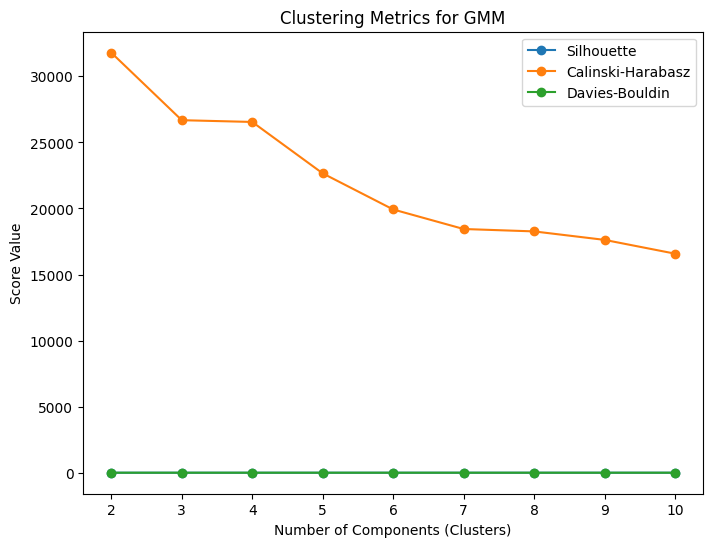

GMM with 2 components: Sil=0.268, CH=31789.990, DB=1.412
GMM with 3 components: Sil=0.278, CH=26683.097, DB=1.291
GMM with 4 components: Sil=0.254, CH=26550.080, DB=1.363
GMM with 5 components: Sil=0.241, CH=22658.840, DB=1.283
GMM with 6 components: Sil=0.222, CH=19926.594, DB=1.595
GMM with 7 components: Sil=0.246, CH=18447.313, DB=1.409
GMM with 8 components: Sil=0.251, CH=18265.729, DB=1.473
GMM with 9 components: Sil=0.240, CH=17624.539, DB=1.552
GMM with 10 components: Sil=0.245, CH=16581.573, DB=1.462


In [46]:
sil_scores = []
ch_scores = []
db_scores = []
n_components_range = range(2, 11)

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    labels = gmm.fit_predict(data_scaled)
    
    sil = silhouette_score(data_scaled, labels)
    ch = calinski_harabasz_score(data_scaled, labels)
    db = davies_bouldin_score(data_scaled, labels)
    
    sil_scores.append(sil)
    ch_scores.append(ch)
    db_scores.append(db)

# Plot the scores
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, sil_scores, label='Silhouette', marker='o')
plt.plot(n_components_range, ch_scores, label='Calinski-Harabasz', marker='o')
plt.plot(n_components_range, db_scores, label='Davies-Bouldin', marker='o')
plt.xlabel('Number of Components (Clusters)')
plt.ylabel('Score Value')
plt.title('Clustering Metrics for GMM')
plt.legend()
plt.show()

for k, sil, ch, db in zip(n_components_range, sil_scores, ch_scores, db_scores):
    print(f"GMM with {k} components: Sil={sil:.3f}, CH={ch:.3f}, DB={db:.3f}")


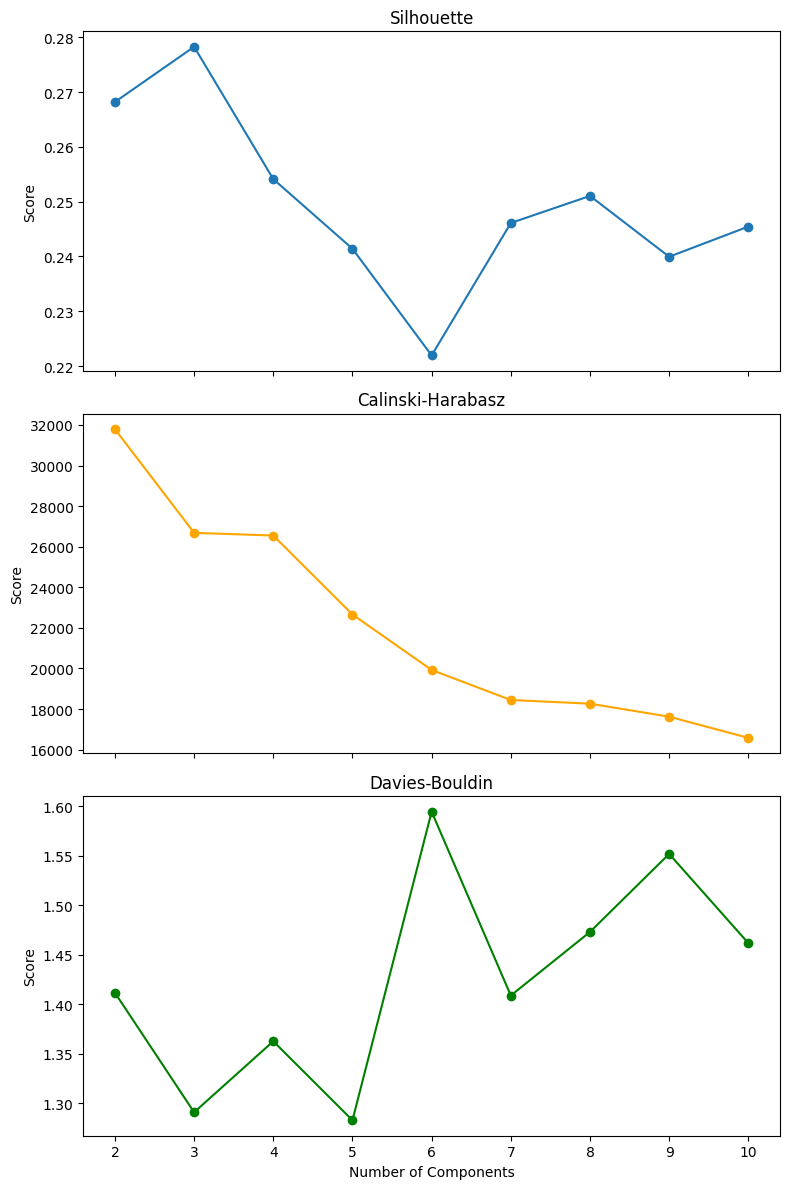

In [47]:
# since above plot does not provide enough details, elaborate plots

fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

axes[0].plot(n_components_range, sil_scores, marker='o')
axes[0].set_title('Silhouette')
axes[0].set_ylabel('Score')

axes[1].plot(n_components_range, ch_scores, marker='o', color='orange')
axes[1].set_title('Calinski-Harabasz')
axes[1].set_ylabel('Score')

axes[2].plot(n_components_range, db_scores, marker='o', color='green')
axes[2].set_title('Davies-Bouldin')
axes[2].set_xlabel('Number of Components')
axes[2].set_ylabel('Score')

plt.tight_layout()
plt.show()


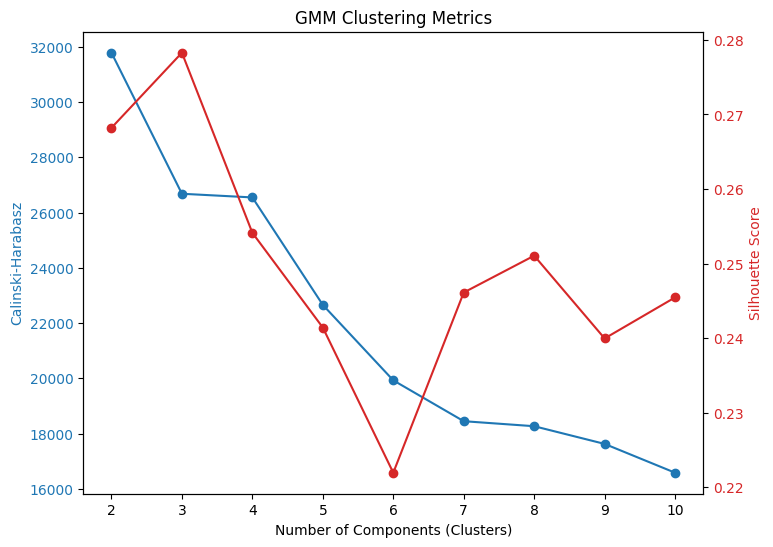

In [48]:
# different perspective for the same results

fig, ax1 = plt.subplots(figsize=(8,6))

color1 = 'tab:blue'
ax1.set_xlabel('Number of Components (Clusters)')
ax1.set_ylabel('Calinski-Harabasz', color=color1)
ax1.plot(n_components_range, ch_scores, color=color1, marker='o', label='Calinski-Harabasz')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  # second y-axis
color2 = 'tab:red'
ax2.set_ylabel('Silhouette Score', color=color2)
ax2.plot(n_components_range, sil_scores, color=color2, marker='o', label='Silhouette')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('GMM Clustering Metrics')
plt.show()


In [49]:
optimal_k = 2  # Suppose you decided on 3 components
final_gmm = GaussianMixture(n_components=optimal_k, random_state=42)
final_labels = final_gmm.fit_predict(data_scaled)

sil = silhouette_score(data_scaled, final_labels)
ch = calinski_harabasz_score(data_scaled, final_labels)
db = davies_bouldin_score(data_scaled, final_labels)

print(f"Final GMM with {optimal_k} components:")
print(f"  Silhouette Score:       {sil:.3f}")
print(f"  Calinski-Harabasz:      {ch:.3f}")
print(f"  Davies-Bouldin:         {db:.3f}")

Final GMM with 2 components:
  Silhouette Score:       0.268
  Calinski-Harabasz:      31789.990
  Davies-Bouldin:         1.412


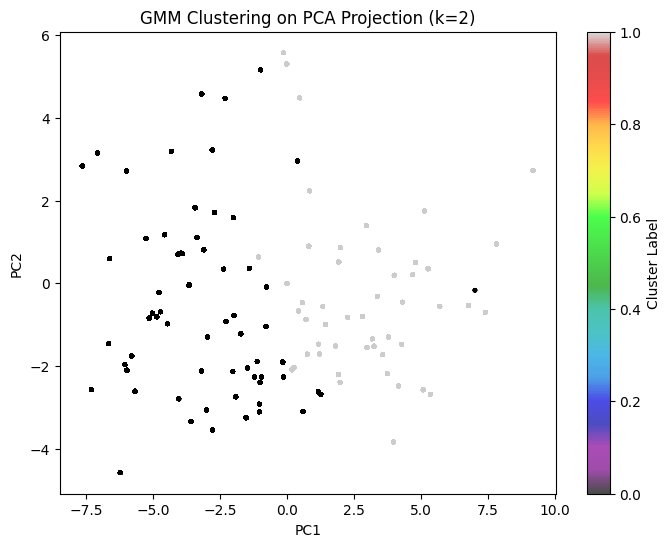

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=final_labels, cmap='nipy_spectral', s=5, alpha=0.7)
plt.title(f'GMM Clustering on PCA Projection (k={optimal_k})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')
plt.show()

####  Final Model and Reliability Scores

In [51]:
# for this model, again k=3 fits better

optimal_k = 3  
final_gmm = GaussianMixture(n_components=optimal_k, random_state=42)
final_labels = final_gmm.fit_predict(data_scaled)

sil = silhouette_score(data_scaled, final_labels)
ch = calinski_harabasz_score(data_scaled, final_labels)
db = davies_bouldin_score(data_scaled, final_labels)

print(f"Final GMM with {optimal_k} components:")
print(f"  Silhouette Score:       {sil:.3f}")
print(f"  Calinski-Harabasz:      {ch:.3f}")
print(f"  Davies-Bouldin:         {db:.3f}")


Final GMM with 3 components:
  Silhouette Score:       0.278
  Calinski-Harabasz:      26683.097
  Davies-Bouldin:         1.291


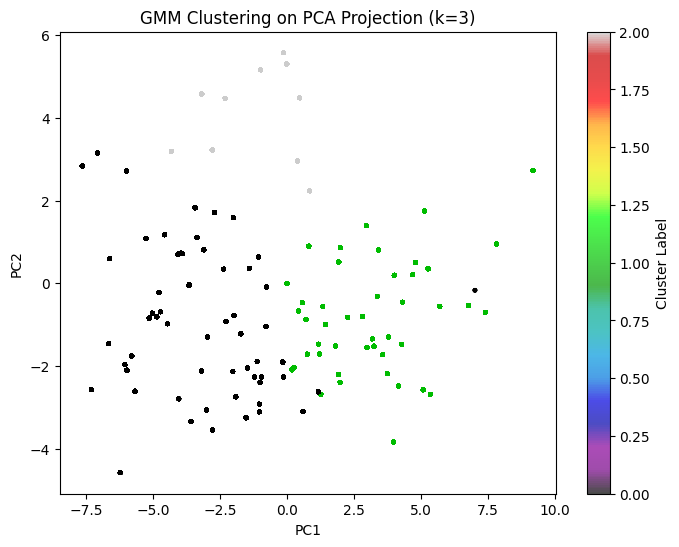

: 

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=final_labels, cmap='nipy_spectral', s=5, alpha=0.7)
plt.title(f'GMM Clustering on PCA Projection (k={optimal_k})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')
plt.show()


# Verdict

Based on the metrics :

- **K-means (3 clusters):**


- **Agglomerative Clustering (4):**


- **Gaussian Mixture Model (3 components):**


**Interpretation:**

- Both **K-means** and **GMM** with 3 clusters produce very similar and slightly better metrics (in terms of Silhouette, CH, and DB) compared to the agglomerative solutions.
- Agglomerative clustering with 3 or 4 clusters shows lower Silhouette scores and higher Davies-Bouldin indices, indicating less clear separation between clusters.
- Since 3 clusters appear consistently optimal for K-means and GMM, and the metrics are nearly identical, you can choose between these two based on additional considerations:
  - **K-means** is simpler, faster, and widely interpretable when clusters are roughly spherical.
  - **GMM** offers a probabilistic approach and can capture more complex (elliptical) cluster shapes if needed.

Given that the metrics are nearly identical and K-means has a slight edge in the CH and DB scores, **K-means with 3 clusters** seems to be the best choice for the final analysis. However, if we require a probabilistic interpretation of cluster membership, GMM is a viable alternative.

**Recommendation:**  
For our dataset (mean scores with relatively close values), proceeding with **K-means clustering using 3 clusters** is recommended for the final calculation.

# Adding clusters to main DF

There are example codes for adding clusters to the main df, but I wil replicate this lost stage in our new data with new variables for bullying

In [13]:

from sklearn.cluster import KMeans

# merge data
# Perform clustering (for example, KMeans with 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)
# Create a DataFrame with the school id and the cluster labels.
# We assume that the row order in 'main' and 'df' is the same.
main['cluster'] = cluster_labels



In [14]:
main.cluster.value_counts()

cluster
1    30045
0    29899
2     9569
Name: count, dtype: int64

In [26]:
# Create a mapping dictionary. In this example:
# cluster 0 -> group 1, cluster 2 -> group 2, cluster 1 -> group 3
mapping = {0: 1, 2: 2, 1: 3}

# Assuming your main DataFrame has a column 'cluster' with the original labels:
main['cluster_group'] = main['cluster'].map(mapping)

# Check the result
print(main[['U031ScID', 'cluster', 'cluster_group']].head())


   U031ScID  cluster  cluster_group
0       1.0        0              1
1       1.0        0              1
2       1.0        0              1
3       1.0        0              1
4       1.0        0              1


In [27]:
main.cluster_group.value_counts()

cluster_group
3    30045
1    29899
2     9569
Name: count, dtype: int64

# Check characterics of these schools

In [28]:
import matplotlib.pyplot as plt

def plot_cluster_indicators(data, cluster_col, indicator_cols, kind='grouped_bar'):
    """
    Plot mean differences of school-level indicators across clusters.
    
    Parameters:
      - data: pandas DataFrame containing the main data including clusters.
      - cluster_col: name of the column that contains cluster labels.
      - indicator_cols: list of columns (school-level indicators) to plot.
      - kind: 'grouped_bar' (default) creates a grouped bar chart; 
              'subplots' creates individual plots for each indicator.
    """
    # Group by the cluster column and compute the mean for each indicator.
    cluster_means = data.groupby(cluster_col)[indicator_cols].mean()
    
    if kind == 'grouped_bar':
        # Transpose so indicators are on the x-axis and clusters are different bars.
        means_transposed = cluster_means.transpose()
        means_transposed.plot(kind='bar', figsize=(10, 6))
        plt.ylabel('Mean Value')
        plt.title('School-Level Indicator Means by Cluster')
        plt.legend(title=cluster_col)
        plt.tight_layout()
        plt.show()
    elif kind == 'subplots':
        n_indicators = len(indicator_cols)
        fig, axes = plt.subplots(n_indicators, 1, figsize=(8, 4 * n_indicators))
        if n_indicators == 1:
            axes = [axes]  # Ensure axes is iterable
        for i, col in enumerate(indicator_cols):
            ax = axes[i]
            # Plot the means for this indicator for each cluster.
            cluster_means[col].plot(kind='bar', ax=ax)
            ax.set_ylabel('Mean Value')
            ax.set_title(f'Mean {col} by Cluster')
        plt.tight_layout()
        plt.show()
    else:
        raise ValueError("kind must be either 'grouped_bar' or 'subplots'.")

# Example usage:
# Assume 'main' is your DataFrame and 'U031ScID' is the school id.
# Also assume that 'cluster' is the column with cluster labels and that
# school-level indicator columns are in the list school_labels.
#
# plot_cluster_indicators(main, cluster_col='cluster', indicator_cols=school_labels, kind='grouped_bar')


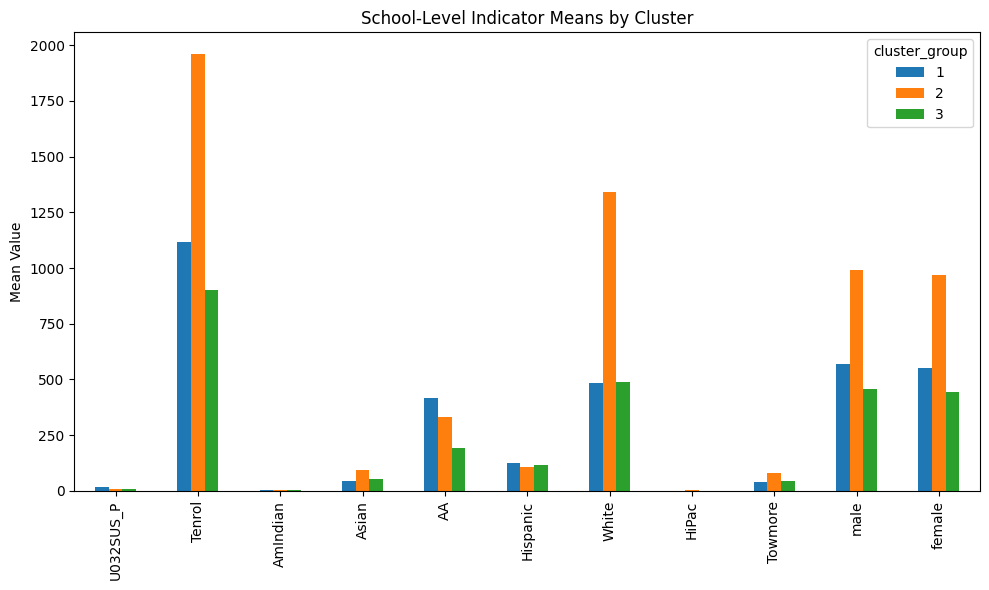

In [29]:
 plot_cluster_indicators(main, cluster_col='cluster_group', indicator_cols=other_variables, kind='grouped_bar')

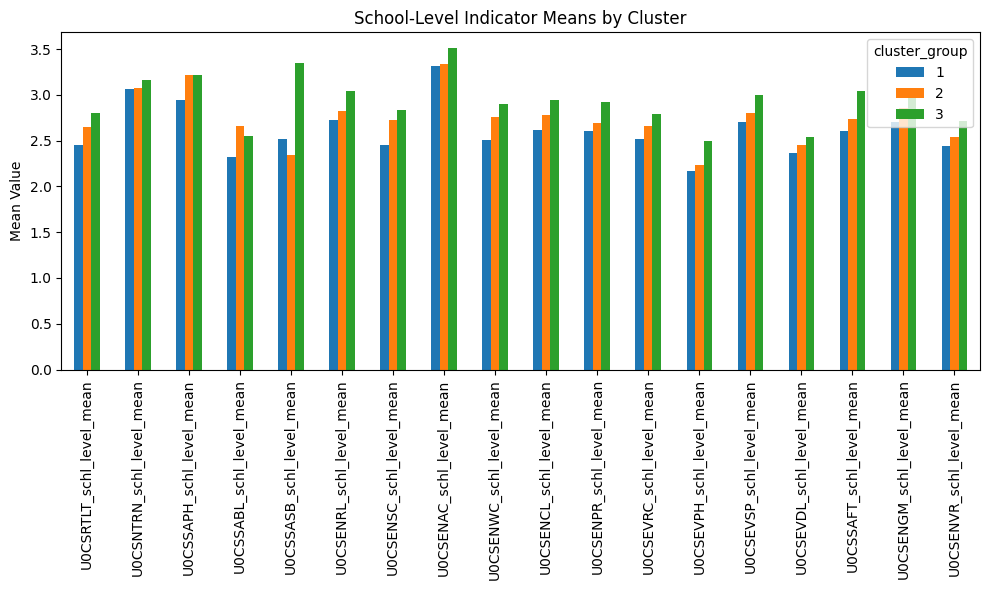

In [30]:
 plot_cluster_indicators(main, cluster_col='cluster_group', indicator_cols=school_climate_scores, kind='grouped_bar')

In [ ]:
# save the file
main.to_csv('data/main.csv')